In [1]:
import numpy as np
import math
import csv
import glob
import pandas as pd
from matplotlib import pyplot
from IPython.display import HTML, display
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.integrate as integrate
import seaborn as sns

%matplotlib inline 

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16 #20

In [3]:
import plotfunctions
%run plotfunctions.py

## Experiments - Data Processing
- Power = 1 Watt
- Volumetric Airflow Rate = 0.5 L/min
- Trials = 3 

In [13]:
### Experiments: Raw Data - Temp Diff
# t=trial, T=sample,T1:2mm,T2:r=0mm (Center),T3:r=1mm,T4:r=4mm 
tempE = pd.read_csv('data_exp/Temp_Diff_Data/exp_1W_0.5LPM.csv')  # Power=1 Watt, Volumetric Airflow=0.5 L/min
# dataE = pd.read_csv('data_exp/Exp_1W_1.65LPM.csv') # Power 1 Watt, Volumetric Airflow=1.65 L/min
timeE = tempE['Time']
tempET1 = [tempE['T1_t1'],tempE['T1_t2'],tempE['T1_t3']]
tempET2 = [tempE['T2_t1'],tempE['T2_t2'],tempE['T2_t3']]
tempET3 = [tempE['T3_t1'],tempE['T3_t2'],tempE['T3_t3']]
tempET4 = [tempE['T4_t1'],tempE['T4_t2'],tempE['T4_t3']]
tempE.tail()

Time  T1_t1  T2_t1  T3_t1  T4_t1  T1_t2  T2_t2  T3_t2  T4_t2  T1_t3  \
916  229.00    0.3   0.34   0.27   0.25   0.23    0.2   0.15   0.26    0.1   
917  229.25    0.3   0.34   0.27   0.25   0.13    0.2   0.15   0.16    0.1   
918  229.50    0.3   0.34   0.27   0.25   0.13    0.1   0.15   0.16    0.1   
919  229.75    0.3   0.34   0.17   0.25   0.23    0.2   0.15   0.26    0.1   
920  230.00    0.3   0.34   0.27   0.25   0.23    0.2   0.15   0.16    0.1   

     T2_t3  T3_t3  T4_t3  
916   0.06   0.16   0.04  
917   0.06  -0.04   0.04  
918   0.06  -0.04   0.04  
919   0.06   0.16   0.04  
920   0.06   0.16   0.04

In [14]:
### Experiments: Raw Data 
tempE = pd.read_csv('data_exp/Raw_Temp_Data/Air Temperature Measurments_1W_0.5LPM.csv')
timeE = tempE['Time']
tempET1 = [tempE['T1T1'],tempE['T2T1'],tempE['T3T1']]
tempET2 = [tempE['T1T2'],tempE['T2T2'],tempE['T3T2']]
tempET3 = [tempE['T1T3'],tempE['T2T3'],tempE['T3T3']]
tempET4 = [tempE['T1T4'],tempE['T2T4'],tempE['T3T4']]
tempE.tail()

Time  T1T1  T1T2  T1T3  T1T4  T2T1  T2T2  T2T3  T2T4  T3T1  T3T2  T3T3  \
916  229.00  20.9  21.5  21.2  21.0  21.1  21.7  21.3  21.3  21.2  21.8  21.5   
917  229.25  20.9  21.5  21.2  21.0  21.0  21.7  21.3  21.2  21.2  21.8  21.3   
918  229.50  20.9  21.5  21.2  21.0  21.0  21.6  21.3  21.2  21.2  21.8  21.3   
919  229.75  20.9  21.5  21.1  21.0  21.1  21.7  21.3  21.3  21.2  21.8  21.5   
920  230.00  20.9  21.5  21.2  21.0  21.1  21.7  21.3  21.2  21.2  21.8  21.5   

     T3T4  
916  21.4  
917  21.4  
918  21.4  
919  21.4  
920  21.4

In [15]:
### Experiments Metrics: mean & standard deviation over 3 samples
i = 75 # Start here because there are a lot of power off values. 
avg0,avg1,avg2,avg4 = [],[],[],[]
sd0,sd1,sd2,sd4 = [],[],[],[]
while i < 150:
    a4 = [tempET4[0][i],tempET4[1][i],tempET4[2][i]] #4mm
    a2 = [tempET1[0][i],tempET1[1][i],tempET1[2][i]] #2mm
    a1 = [tempET3[0][i],tempET3[1][i],tempET3[2][i]] #1mm     
    a0 = [tempET2[0][i],tempET2[1][i],tempET2[2][i]] #center
    avg0.append(np.average(a0))
    avg1.append(np.average(a1))
    avg2.append(np.average(a2))
    avg4.append(np.average(a4))
    sd0.append(np.std(a0))
    sd1.append(np.std(a1))
    sd2.append(np.std(a2))
    sd4.append(np.std(a4))
    i +=1

# Take the largest standard deviation and apply that across all avgs 
# Key: u=upper bound, l=lower bound
u0=avg0 + 1*max(sd0) #/len(a0) # 3 samples
u1=avg1 + 1*max(sd1) #/len(a0) # 3 samples
u2=avg2 + 1*max(sd2) #/len(a0) # 3 samples
u4=avg4 + 1*max(sd4) #/len(a0) # 3 samples
l0=avg0 - 1*max(sd0) #/len(a0) # 3 samples
l1=avg1 - 1*max(sd1) #/len(a0) # 3 samples
l2=avg2 - 1*max(sd2) #/len(a0) # 3 samples
l4=avg4 - 1*max(sd4) #/len(a0) # 3 samples

## Experiments - Plots

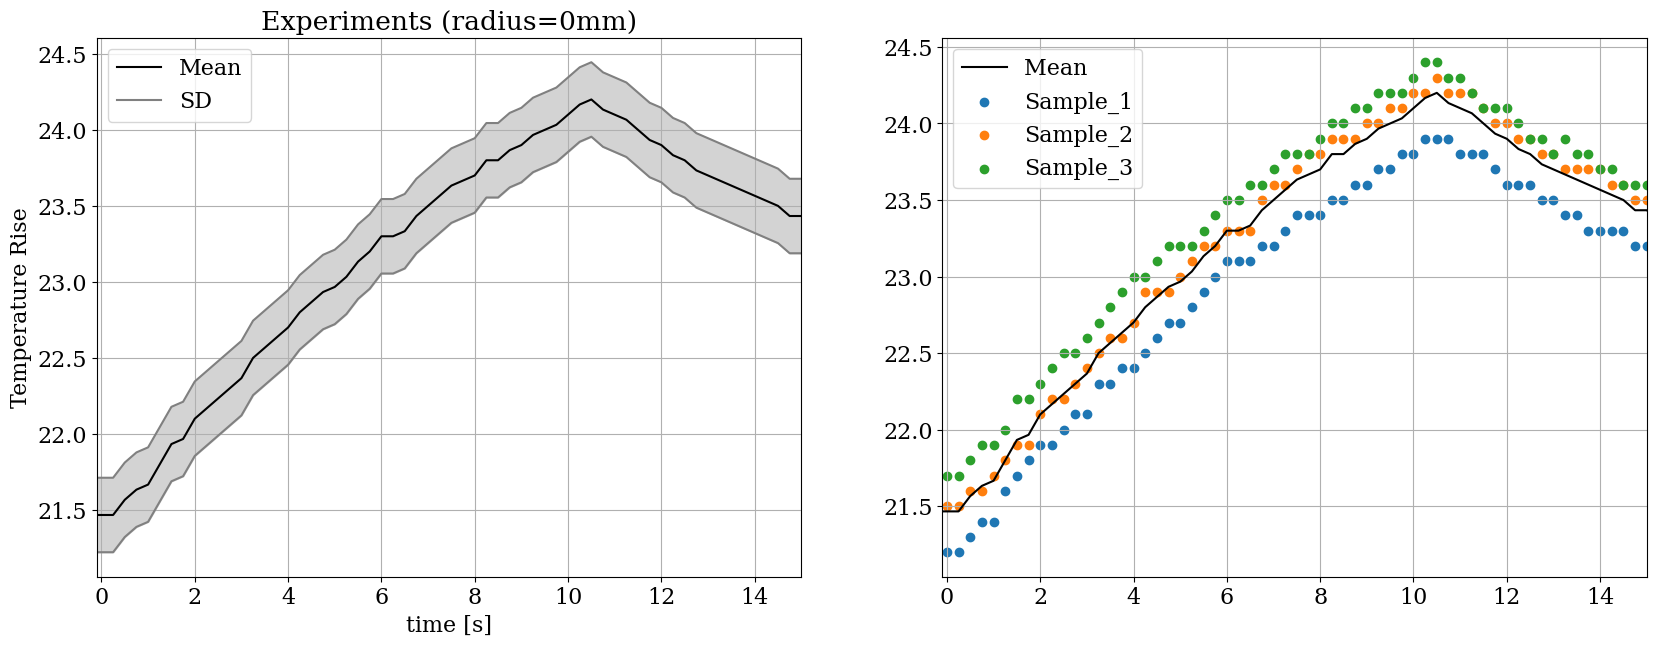

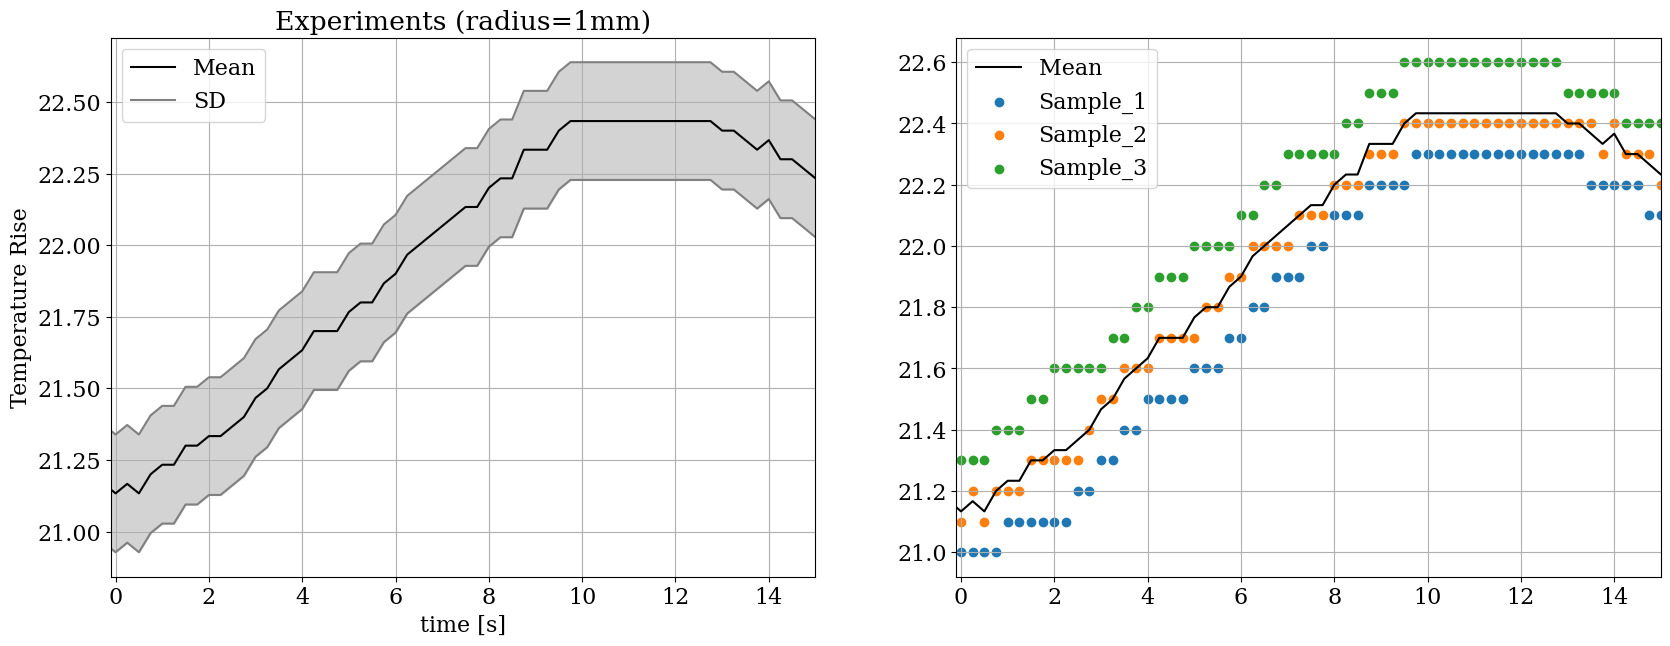

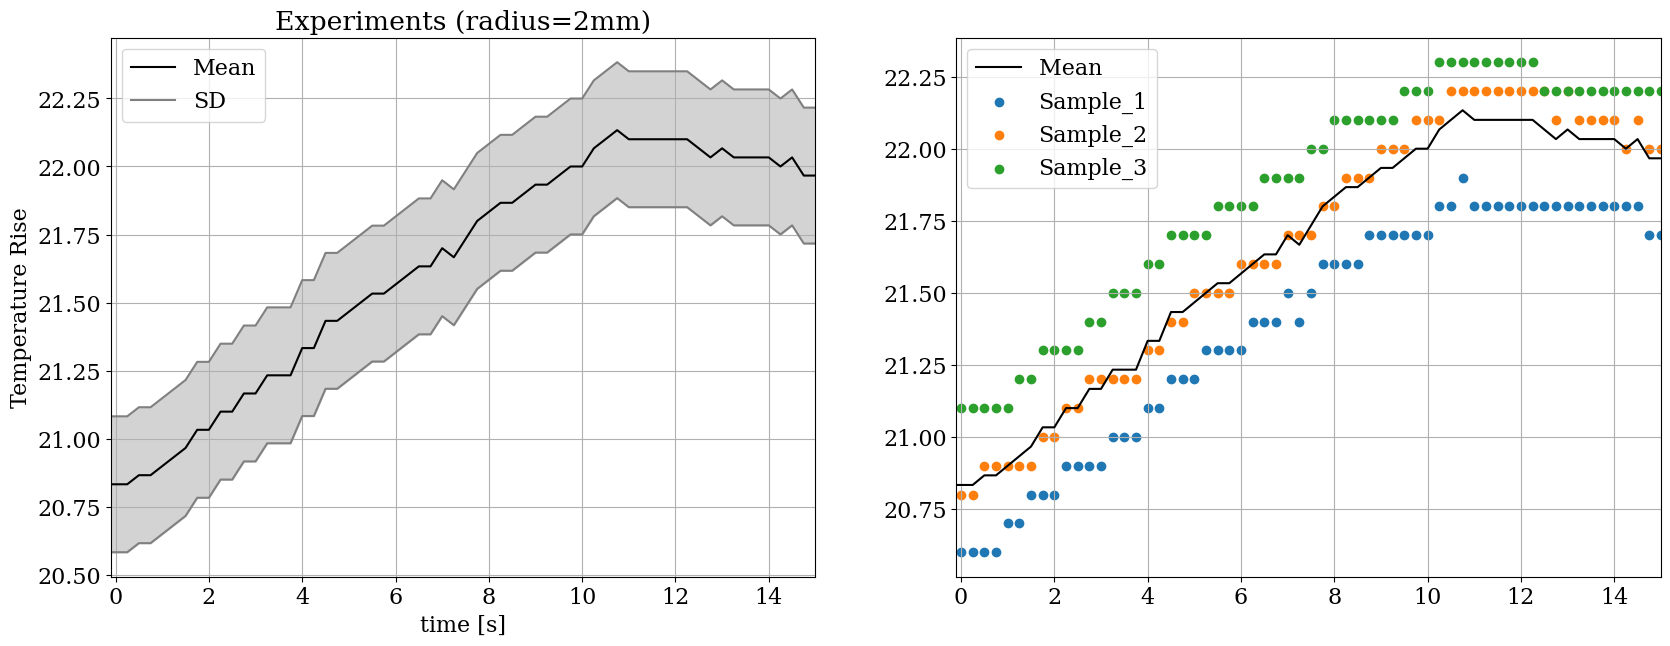

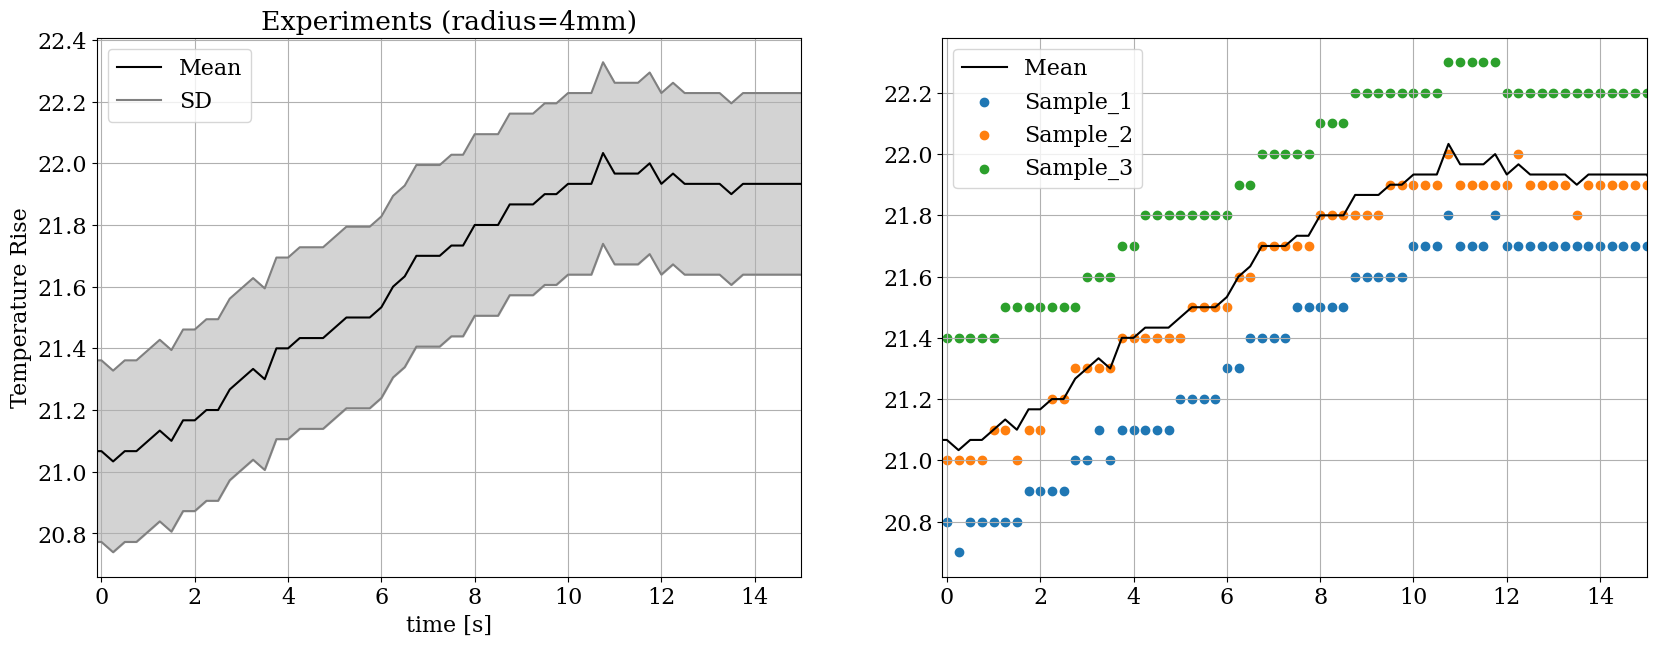

In [16]:
save = 'NO' #'YES'
exp_statsvsraw_2plots(0,timeE,avg0,u0,l0,tempET2,save)
exp_statsvsraw_2plots(1,timeE,avg1,u1,l1,tempET3,save)    
exp_statsvsraw_2plots(2,timeE,avg2,u2,l2,tempET1,save)    
exp_statsvsraw_2plots(4,timeE,avg4,u4,l4,tempET4,save)

NameError: name 'avg4' is not defined

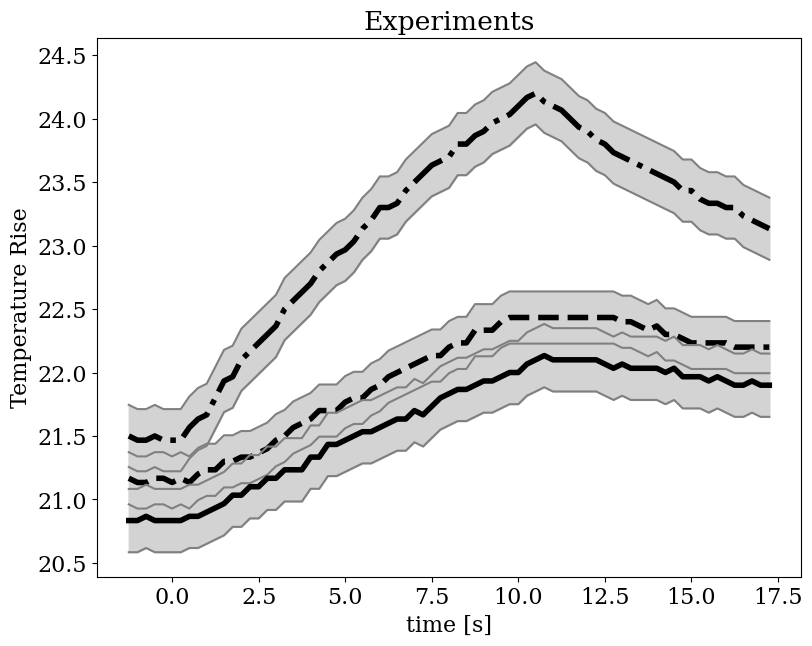

In [18]:
save = 'No' #'YES'
exp_ALL_2plots(timeE,avg0,avg1,avg2,avg4,u0,u1,u2,u4,l0,l1,l2,l4,tempET1,tempET2,tempET3,tempET4,save)

# Simulation - HAFM Full Geometry 

### Applied Power Profiles

In [19]:
dataPowerS1 = pd.read_csv("power_data/samples_LHS/sample1.csv")
dataPowerS2 = pd.read_csv('power_data/samples_LHS/sample2.csv')
dataPowerS3 = pd.read_csv('power_data/samples_LHS/sample3.csv')
dataPowerS4 = pd.read_csv('power_data/samples_LHS/sample4.csv')
dataPowerS5 = pd.read_csv('power_data/samples_LHS/sample5.csv')
dataPowerS6 = pd.read_csv('power_data/samples_LHS/sample6.csv')
dataPowerS7 = pd.read_csv('power_data/samples_LHS/sample7.csv')
dataPowerS8 = pd.read_csv('power_data/samples_LHS/sample8.csv')
dataPowerS9 = pd.read_csv('power_data/samples_LHS/sample9.csv')
dataPowerS10 = pd.read_csv('power_data/samples_LHS/sample10.csv')

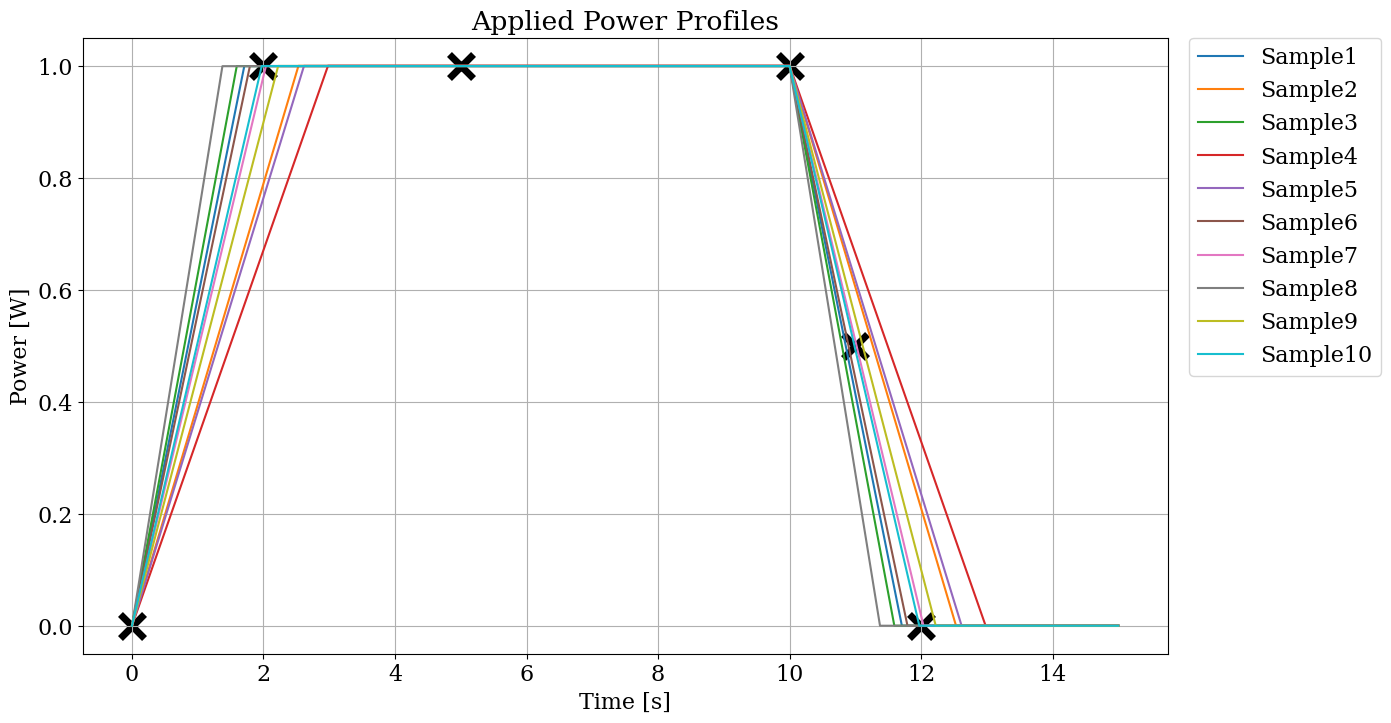

In [20]:
save = 'YES' #'YES'
powerprof(dataPowerS1,dataPowerS2,dataPowerS3,dataPowerS4,dataPowerS5,
          dataPowerS6,dataPowerS7,dataPowerS8,dataPowerS9,dataPowerS10, save)

# Preliminary UQ Study
2 Sample study only to explore extrapolation, and error in the x direction and y direction. 

In [26]:
### Experiments: Raw Data 
tempE = pd.read_csv('data_exp/Raw_Temp_Data/Air Temperature Measurments_1W_0.5LPM.csv')
# timeE = tempE['Time']
# tempET1 = [tempE['T1T1'],tempE['T2T1'],tempE['T3T1']]
# tempET2 = [tempE['T1T2'],tempE['T2T2'],tempE['T3T2']]
# tempET3 = [tempE['T1T3'],tempE['T2T3'],tempE['T3T3']]
# tempET4 = [tempE['T1T4'],tempE['T2T4'],tempE['T3T4']]
# tempE.tail()


# dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSimS1 = pd.read_csv("data_sim/uq_prop/outputsample1.csv")
dataSimS2 = pd.read_csv("data_sim/uq_prop/outputsample2.csv")

In [27]:
timeS1,tempS1Inlet,tempS1rneg0_5,tempS1r0,tempS1r0x0_5,tempS1r0_5,tempS1r1TRILINEAR,tempS1r1,tempS1r1x0_5,tempS1r1_5,tempS1r2TRILINEAR,tempS1r2,tempS1r2x0_5,tempS1r2_5,tempS1r3,tempS1r3x0_5,tempS1r3_5,tempS1r4,tempS1r4x0_5,tempS1r5= SimSamplesTemp(dataSimS1)
timeS2,tempS2Inlet,tempS2rneg0_5,tempS2r0,tempS2r0x0_5,tempS2r0_5,tempS2r1TRILINEAR,tempS2r1,tempS2r1x0_5,tempS2r1_5,tempS2r2TRILINEAR,tempS2r2,tempS2r2x0_5,tempS2r2_5,tempS2r3,tempS2r3x0_5,tempS2r3_5,tempS2r4,tempS2r4x0_5,tempS2r5= SimSamplesTemp(dataSimS2)

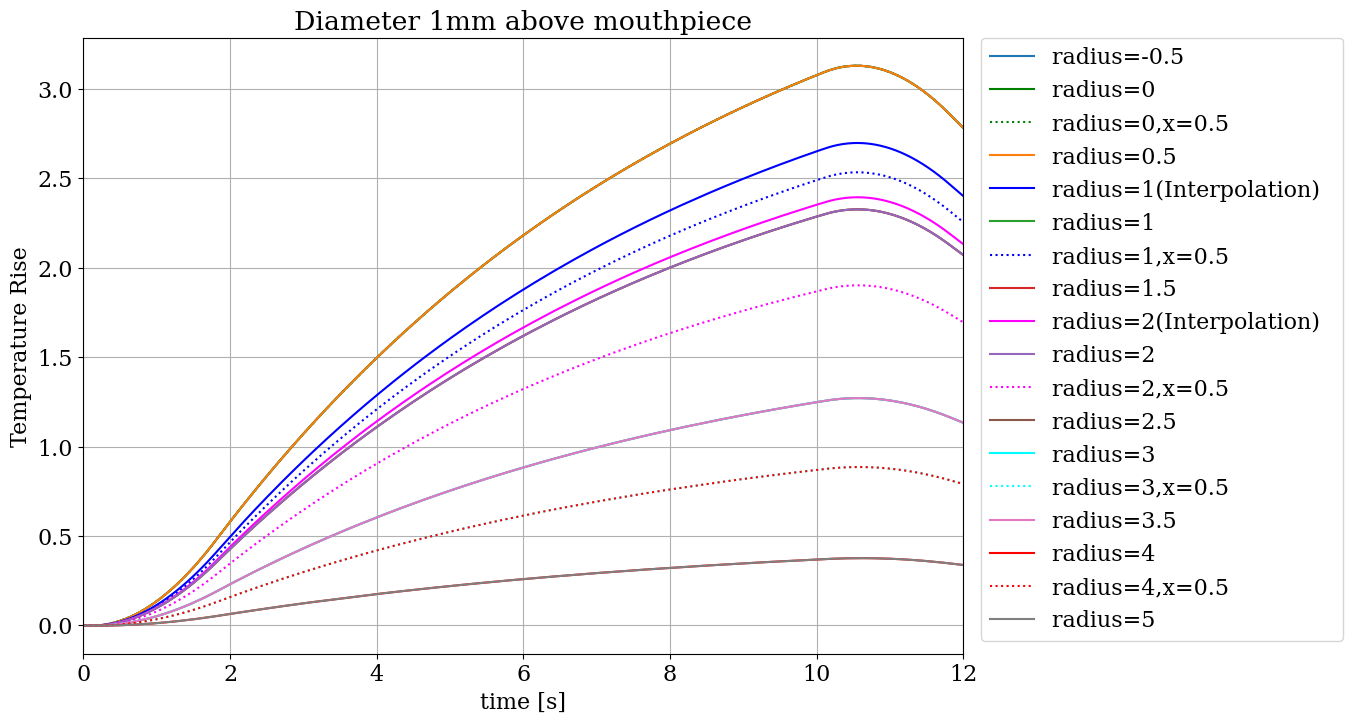

In [28]:
plotE = 'No' #'Yes', Do you want to show the experiments?   
plotSinlet = 'No' #'Yes', Do you want to plot the inlet temperature?
plotSradius = [0,1,2,3,4,5] # all radii = [0,1,2,3,4,5] , Select which radii you want to plot around
plotsave = 'Yes' #'Yes'
sim_exp_r0_5(timeE,avg0,avg1,avg2,avg4,u0,u1,u2,u4,l0,l1,l2,l4,
                 timeS1,tempS1Inlet,tempS1rneg0_5,tempS1r0,tempS1r0x0_5,tempS1r0_5,
                 tempS1r1TRILINEAR,tempS1r1,tempS1r1x0_5,tempS1r1_5,tempS1r2TRILINEAR,
                 tempS1r2,tempS1r2x0_5,tempS1r2_5,tempS1r3,tempS1r3x0_5,tempS1r3_5,
                 tempS1r4,tempS1r4x0_5,tempS1r5,
                 plotE,plotSinlet,plotSradius,plotsave) # Only for Sample 1

# HAFM - UQ Study 
This study was performed with 10 LHS simulation samples and 3 experiments. 

In [29]:
tempS1 = pd.read_csv("Samples/output/New_Samples/outputSample1.csv",skiprows = 4)
tempS2 = pd.read_csv("Samples/output/New_Samples/outputSample2.csv",skiprows = 4)
tempS3 = pd.read_csv("Samples/output/New_Samples/outputSample3.csv",skiprows = 4)
tempS4 = pd.read_csv("Samples/output/New_Samples/outputSample4.csv",skiprows = 4)
tempS5 = pd.read_csv("Samples/output/New_Samples/outputSample5.csv",skiprows = 4)
tempS6 = pd.read_csv("Samples/output/New_Samples/outputSample6.csv",skiprows = 4)
tempS7 = pd.read_csv("Samples/output/New_Samples/outputSample7.csv",skiprows = 4)
tempS8 = pd.read_csv("Samples/output/New_Samples/outputSample8.csv",skiprows = 4)
tempS9 = pd.read_csv("Samples/output/New_Samples/outputSample9.csv",skiprows = 4)
tempS10 = pd.read_csv("Samples/output/New_Samples/outputSample10.csv",skiprows = 4)
tempSLab = tempS1.columns # header labels

### QOI = Max Temperature 
At the 1mm above the mouthpiece, over 10 samples. 

In [30]:
i,s,uq = 1,1,[]
tempS1Max,tempS2Max,tempS3Max,tempS4Max,tempS5Max = [],[],[],[],[]
tempS6Max,tempS7Max,tempS8Max,tempS9Max,tempS10Max = [],[],[],[],[]
while i < len(tempSLab):
    tempS1Max.append( np.max(tempS1 [tempSLab[i]]))
    tempS2Max.append( np.max(tempS2 [tempSLab[i]]))
    tempS3Max.append( np.max(tempS3 [tempSLab[i]]))
    tempS4Max.append( np.max(tempS4 [tempSLab[i]]))
    tempS5Max.append( np.max(tempS5 [tempSLab[i]]))
    tempS6Max.append( np.max(tempS6 [tempSLab[i]]))
    tempS7Max.append( np.max(tempS7 [tempSLab[i]]))
    tempS8Max.append( np.max(tempS8 [tempSLab[i]]))
    tempS9Max.append( np.max(tempS9 [tempSLab[i]]))
    tempS10Max.append(np.max(tempS10[tempSLab[i]]))
    i+=1;
tempMax =pd.DataFrame([tempS1Max,tempS2Max,tempS3Max,tempS4Max,tempS5Max,
         tempS6Max,tempS7Max,tempS8Max,tempS9Max,tempS10Max])
tempMax.columns = tempSLab[1:]
while s < len(tempSLab):
    x = str(np.mean(tempMax[tempSLab[s]]))
    y = str(np.std(tempMax[tempSLab[s]]))
    uq.append(x + '+/- '+ y)
    s+=1;
maxUQ = pd.DataFrame(uq)
maxUQtrans = maxUQ.transpose()
maxUQtrans.columns = tempSLab[1:]
pd.DataFrame([maxUQtrans['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']],
             ['r=0mm','r=1mm','r=2mm','r=3mm','r=4mm'])

0
r=0mm          301.1741424+/- 0.06497557027406756
r=1mm   300.98871779999996+/- 0.06167291868040537
r=2mm  300.67769770000007+/- 0.057461120824522934
r=3mm         299.8660247+/- 0.041136931144782195
r=4mm         298.9783265+/- 0.019351051895184514

# Diameter 1mm above mouthpiece
- Point0: 0mm radius (center)
- Point1: 1mm radius
- Point2: 2mm radius
- Point3: 3mm radius (no equivalence in experiments)
- Point4: 4mm radius

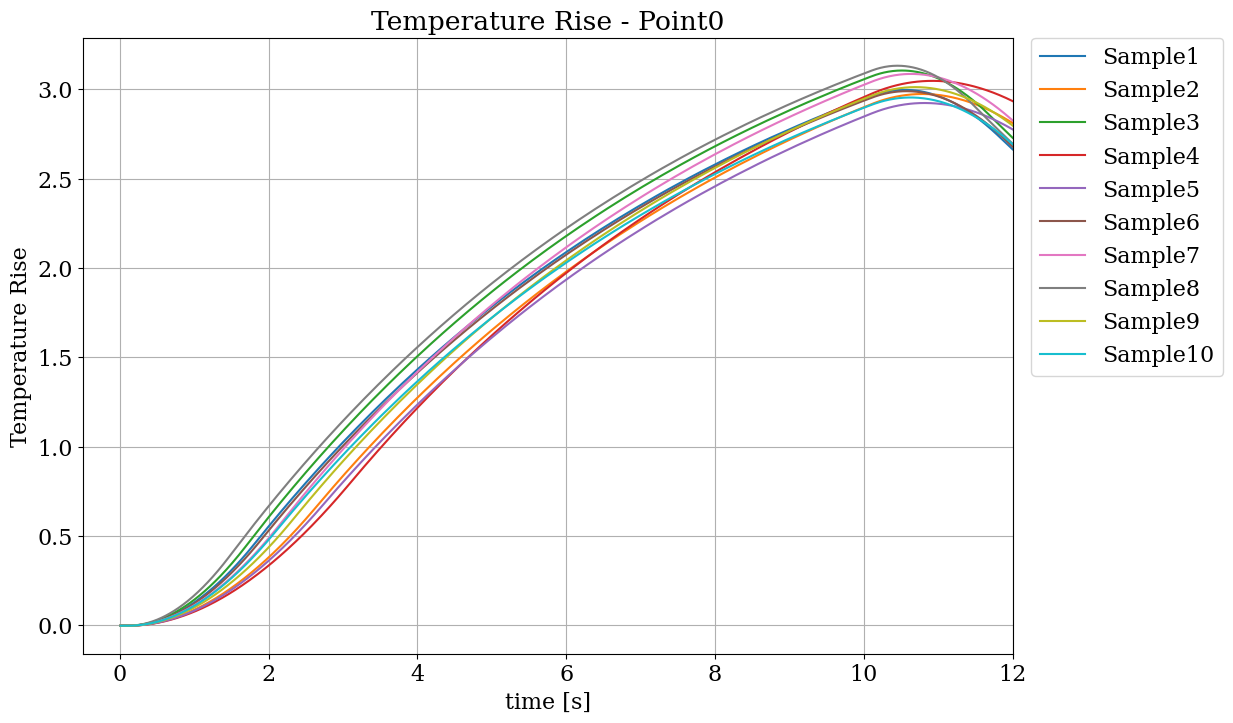

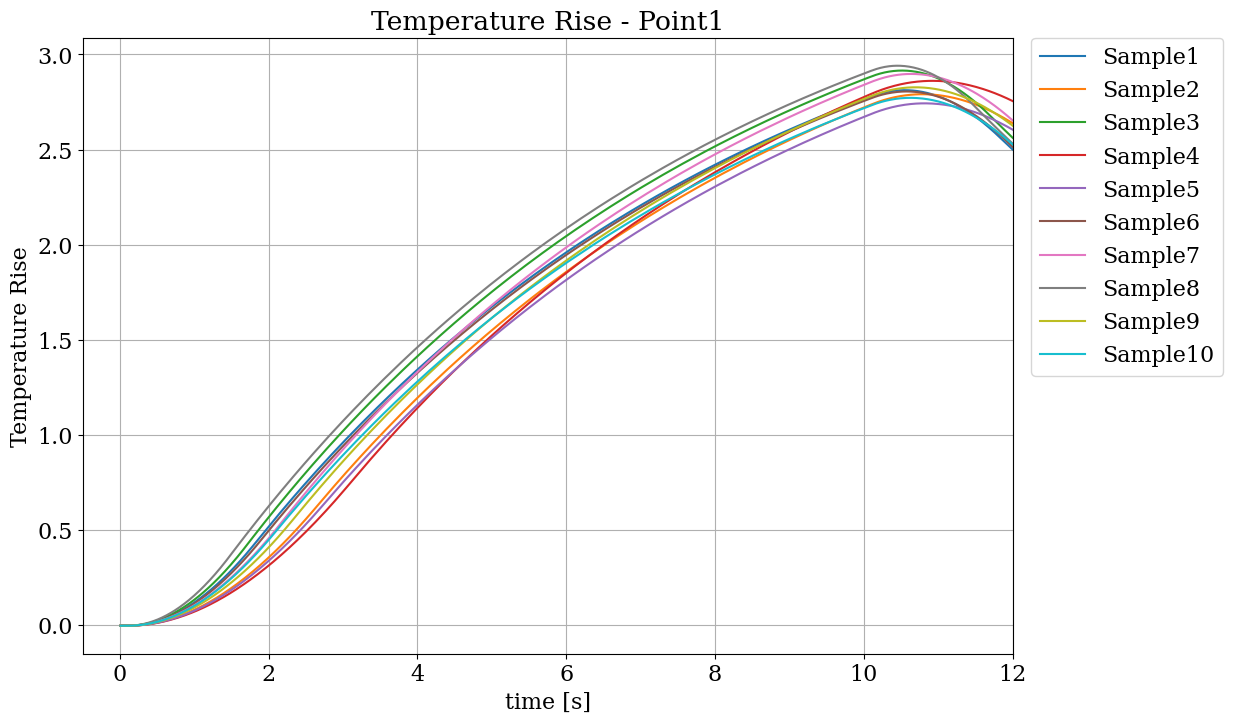

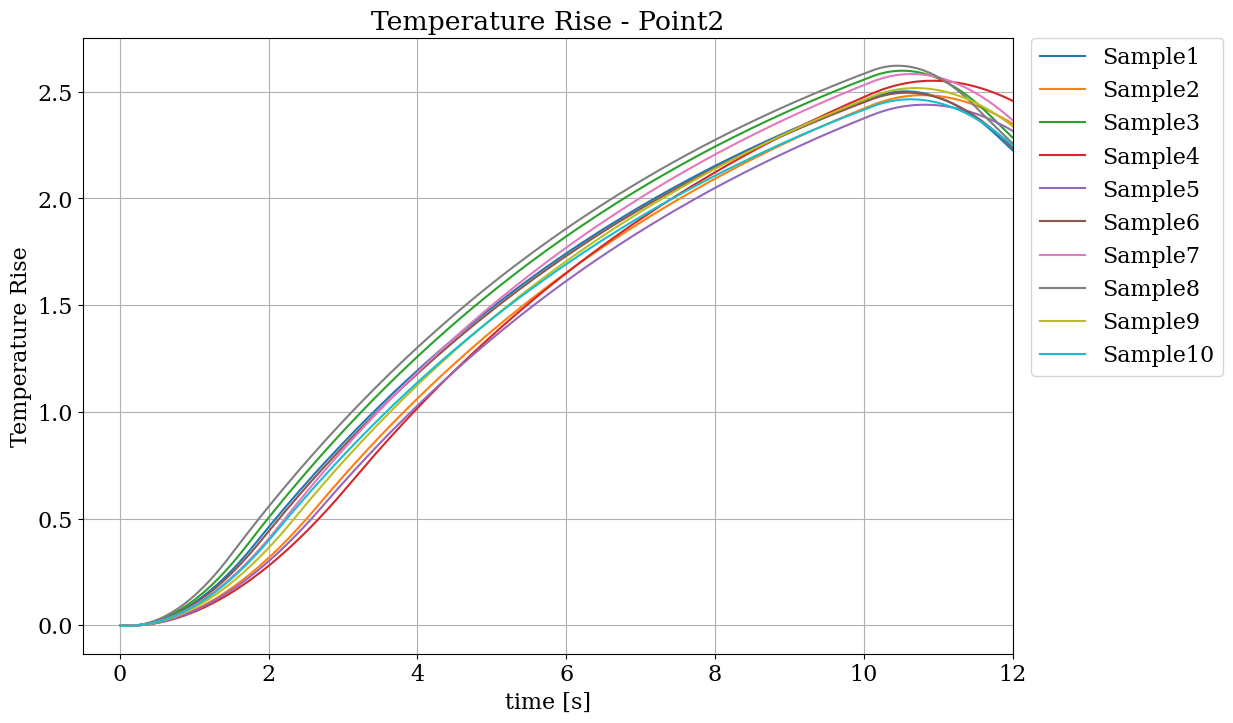

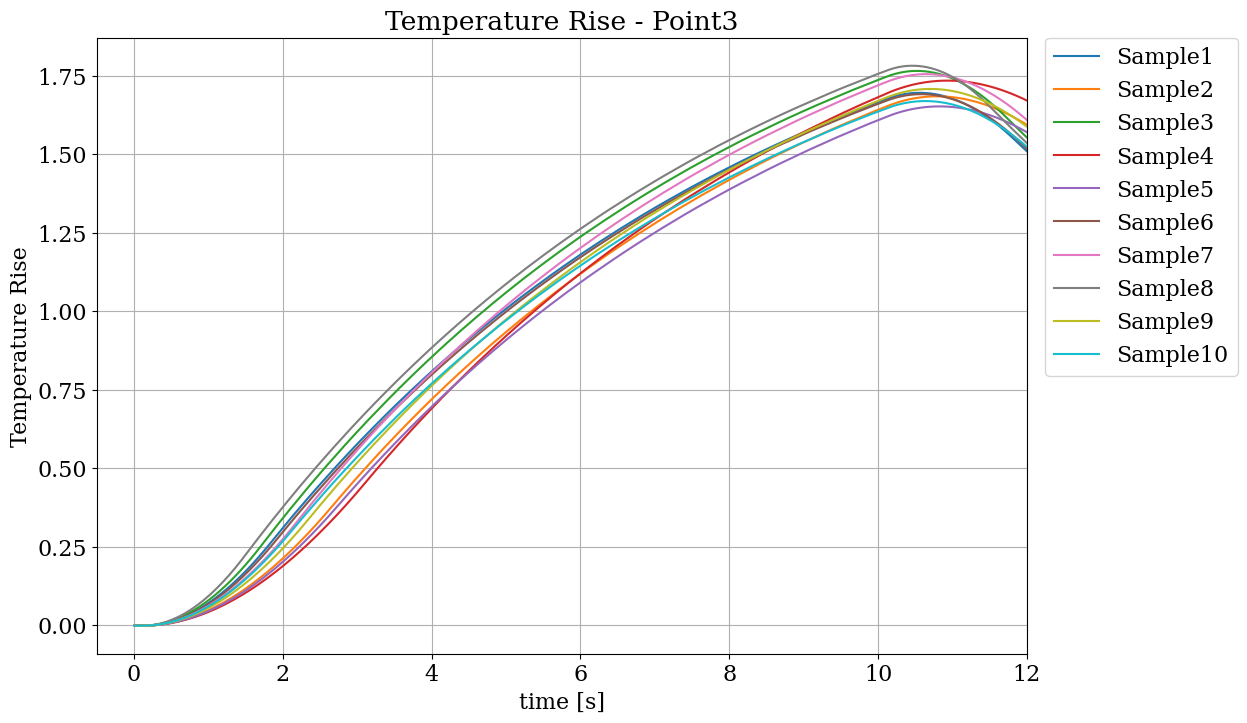

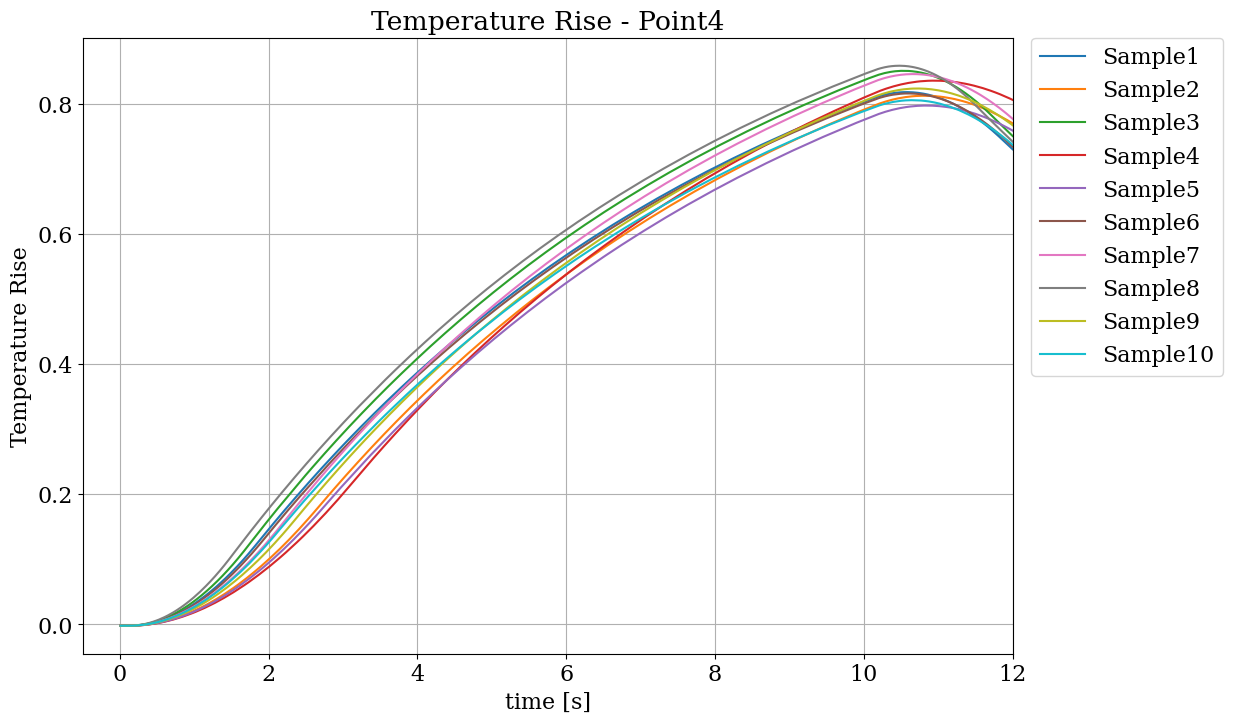

In [31]:
# Point 0
r, point0 = 0, 'Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'Yes' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg0,u0,l0,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point0,save,plotexp)

# Point 1
r, point1 = 1, 'Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'Yes' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point1,save,plotexp)

# Point 2
r, point2 = 2, 'Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'Yes' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg2,u2,l2,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point2,save,plotexp)

# Point 3
r, point3 = 3, 'Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'Yes' # 'YES'
plotexp = 'NO' # This data doesn't exist
sim_exp_pointlabels(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point3,save,plotexp)

# Point 4
r, point4 = 4, 'Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'Yes' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg4,u4,l4,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point4,save,plotexp)

# All Samples at a Point

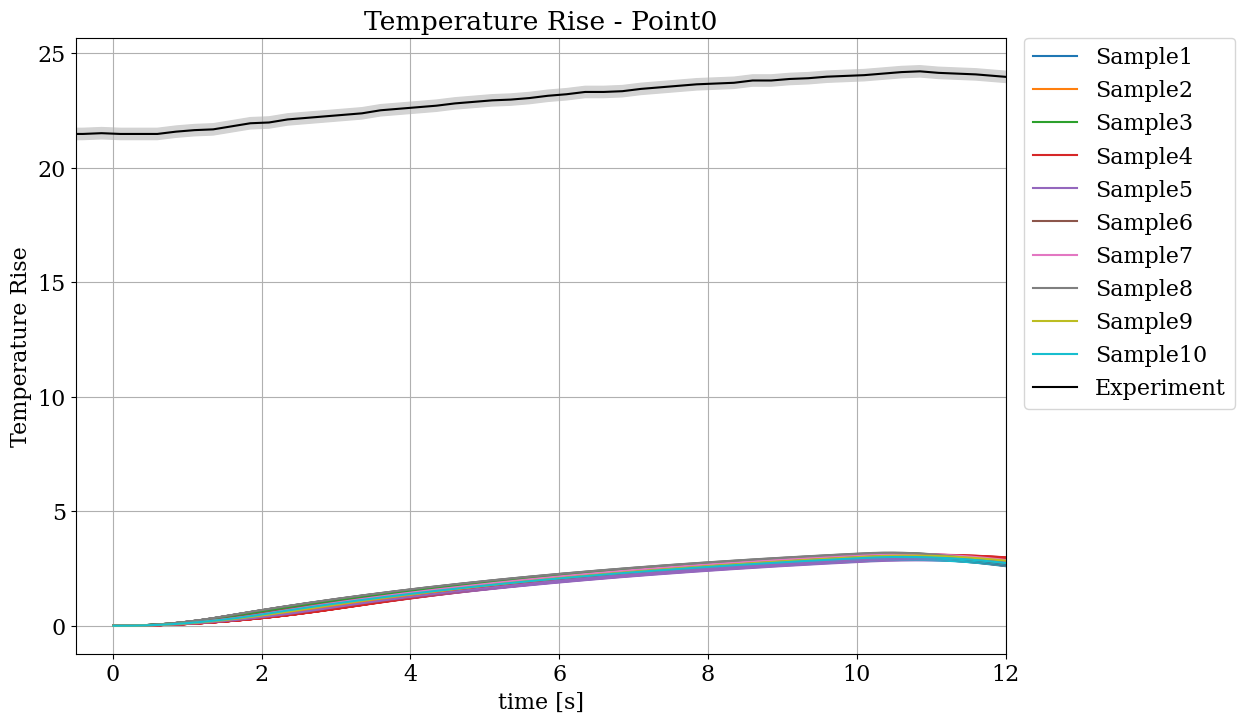

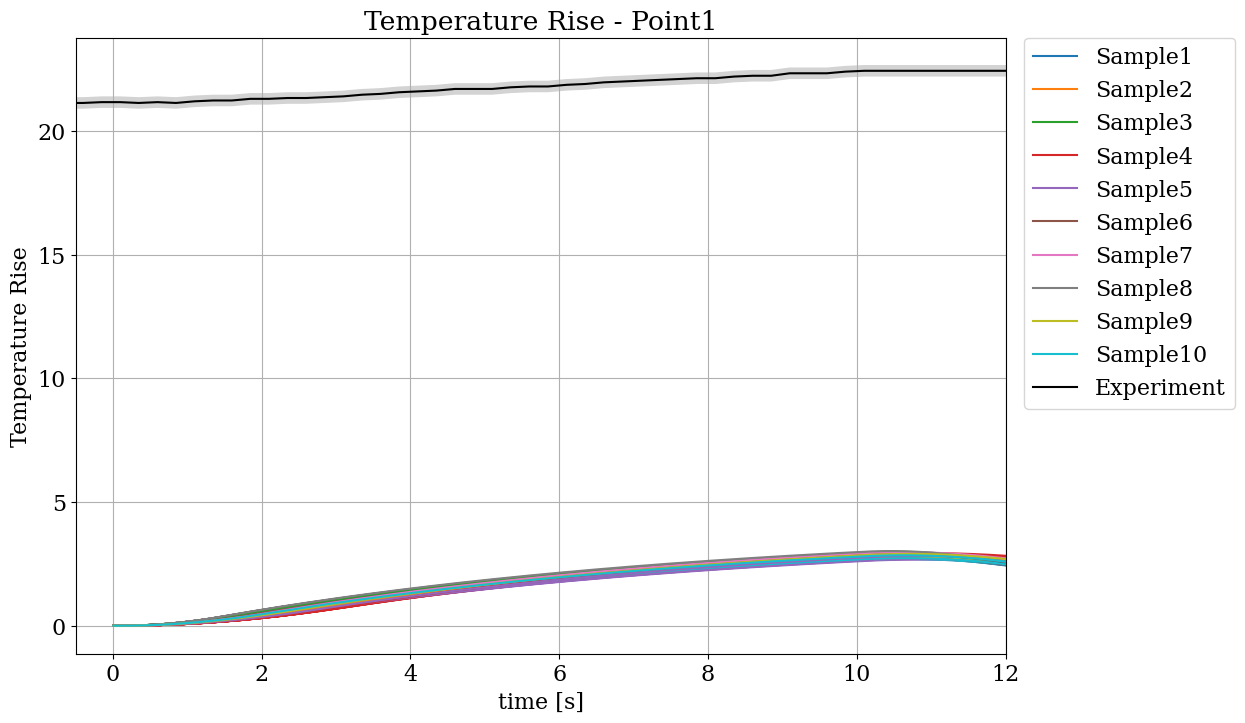

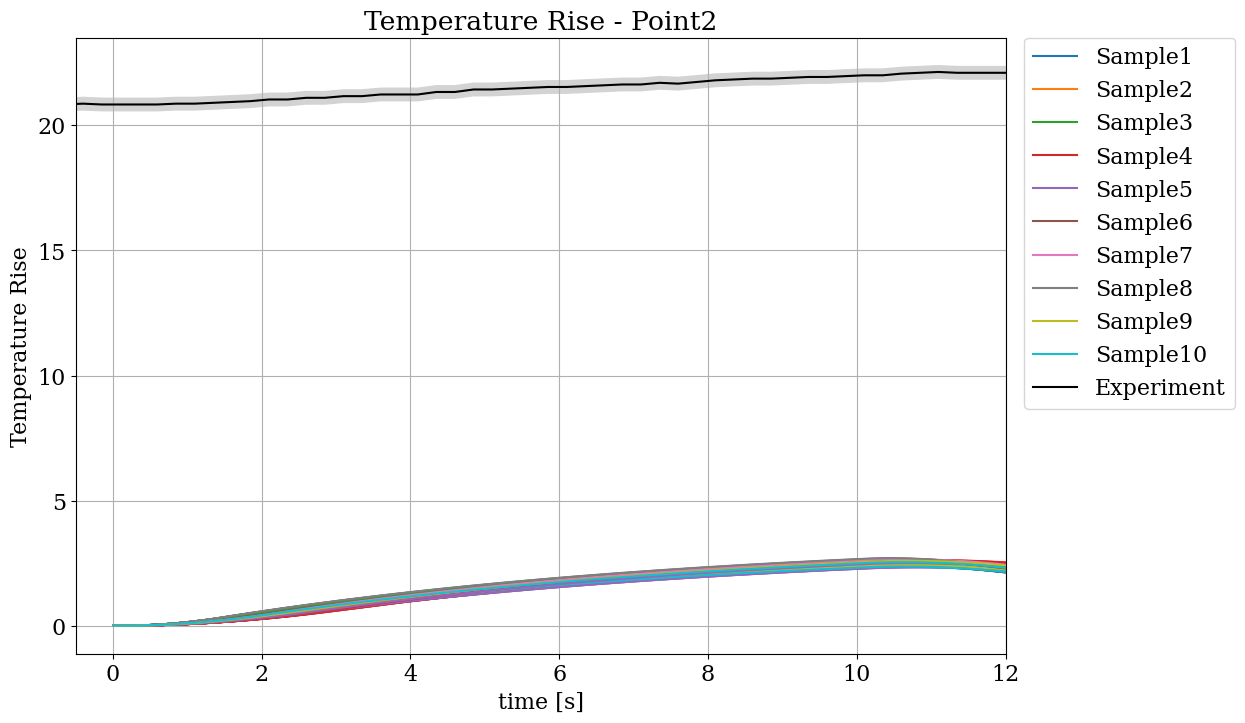

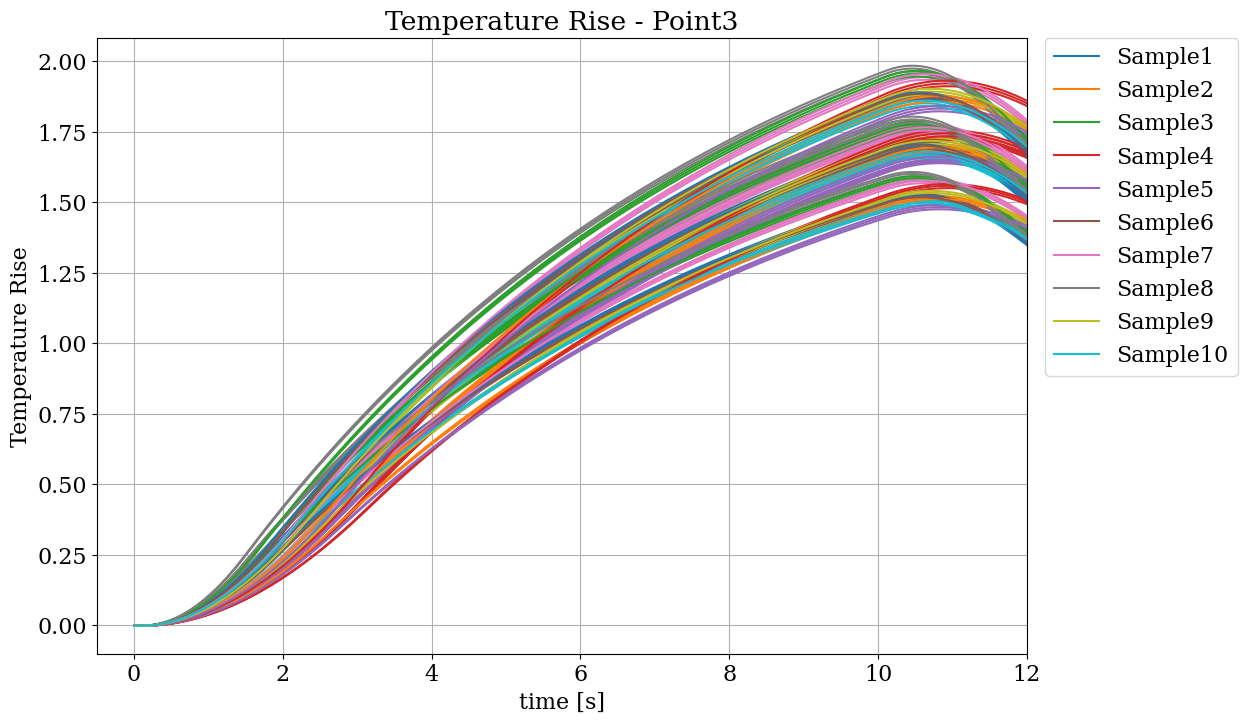

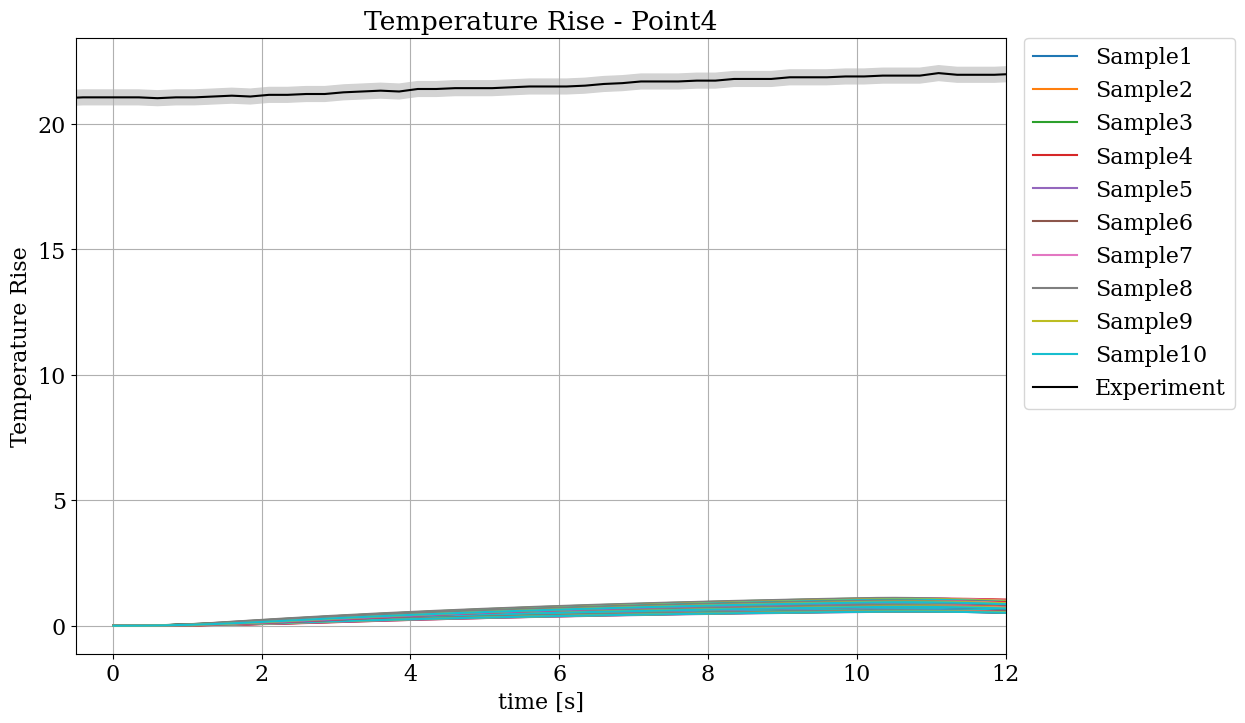

In [32]:
#Point 0
points = ['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']
r = 0# radius for label
save = 'NO' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_point(timeE,avg0,u0,l0,tempS1,tempS2,tempS3,tempS4,tempS5,
                  tempS6,tempS7,tempS8,tempS9,tempS10,points,
                  tempSLab,r,save,plotexp)
#Point 1
points = ['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']
r = 1 # radius for label
save = 'NO' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_point(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,
                  tempS6,tempS7,tempS8,tempS9,tempS10,points,
                  tempSLab,r,save,plotexp)
#Point 2
points = ['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']
r = 2 # radius for label
save = 'NO' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_point(timeE,avg2,u2,l2,tempS1,tempS2,tempS3,tempS4,tempS5,
                  tempS6,tempS7,tempS8,tempS9,tempS10,points,
                  tempSLab,r,save,plotexp)
#Point 3
points = ['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']
r = 3 # radius for label
save = 'NO' # 'YES'
plotexp = 'NO' # 'This data doesn't exist 
sim_exp_point(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,
                  tempS6,tempS7,tempS8,tempS9,tempS10,points,
                  tempSLab,r,save,plotexp)
#Point 4
points = ['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']
r = 4 # radius for label
save = 'NO' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_point(timeE,avg4,u4,l4,tempS1,tempS2,tempS3,tempS4,tempS5,
                  tempS6,tempS7,tempS8,tempS9,tempS10,points,
                  tempSLab,r,save,plotexp)

# Uncertainties
This finds the mean and standard deviation around each point accounting for uncertainties in both the input and the output locations.

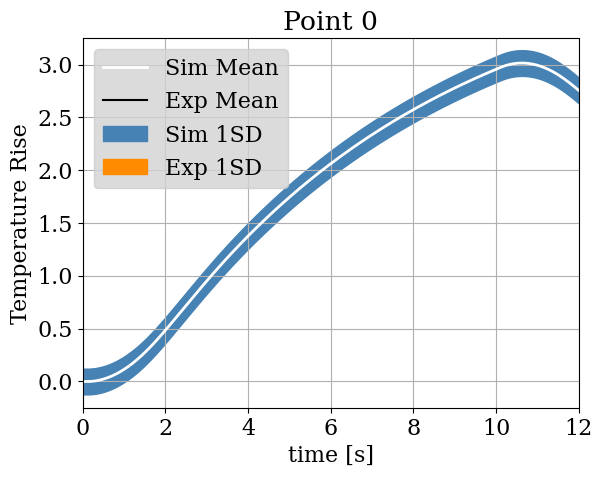

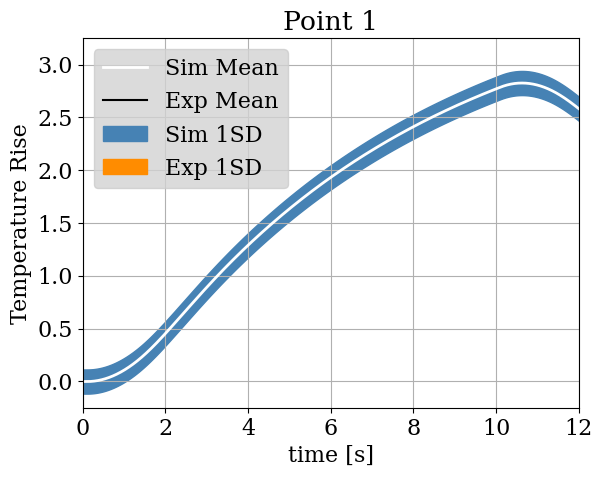

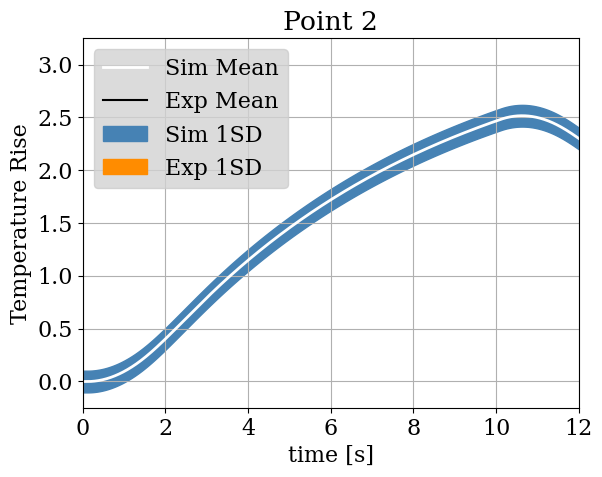

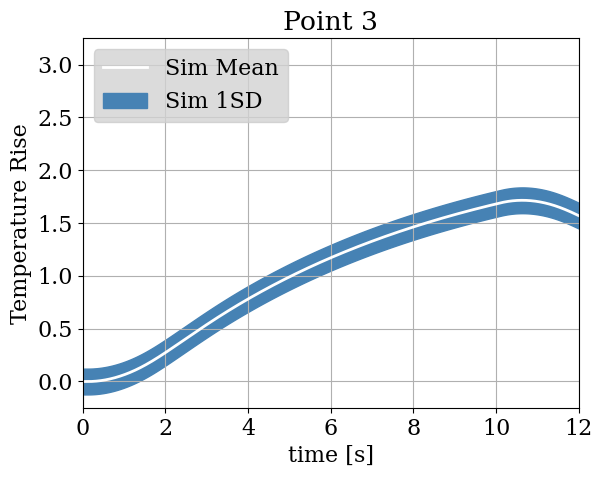

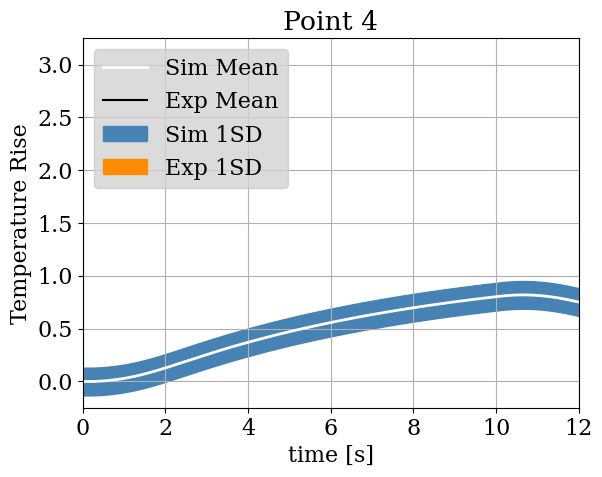

In [33]:
points = ['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP0, stdSamplesP0 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
r = 0 # radius for label
save = 'YES' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_uncertainties(timeE,avg0,u0,l0,tempS1,meanSamplesP0,stdSamplesP0,r,save,plotexp)

points = ['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP1, stdSamplesP1 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
r = 1 # radius for label
save = 'YES' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_uncertainties(timeE,avg1,u1,l1,tempS1,meanSamplesP1,stdSamplesP1,r,save,plotexp)

points = ['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']
meanSamplesP2, stdSamplesP2 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
r = 2 # radius for label
save = 'YES' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_uncertainties(timeE,avg2,u2,l2,tempS1,meanSamplesP2,stdSamplesP2,r,save,plotexp)

points = ['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP3, stdSamplesP3 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
r = 3 # radius for label
save = 'YES' # 'YES'
plotexp = 'NO' # 'YES'
sim_exp_uncertainties(timeE,avg1,u1,l1,tempS1,meanSamplesP3,stdSamplesP3,r,save,plotexp)

points = ['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP4, stdSamplesP4 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
r = 4 # radius for label
save = 'YES' # 'YES'
plotexp = 'YES' # 'YES'
sim_exp_uncertainties(timeE,avg4,u4,l4,tempS1,meanSamplesP4,stdSamplesP4,r,save,plotexp)

### Summary of Data - Plots

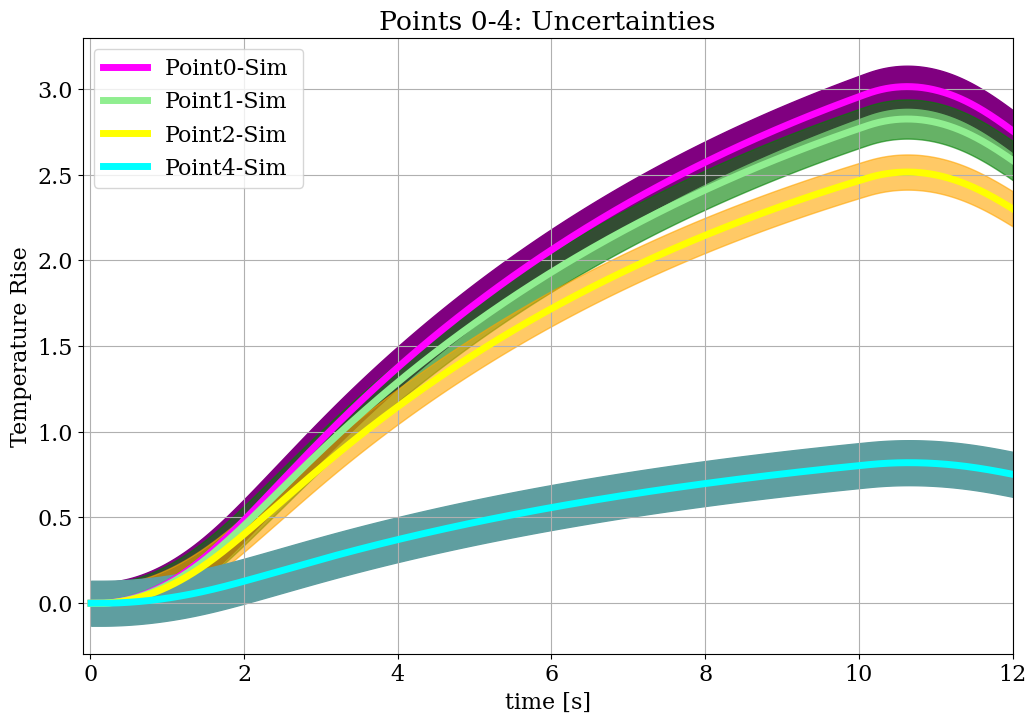

In [34]:
save = 'YES' # 'YES'
plotexp = 'No' # 'YES'
plotSradius = [0,1,2,4] # [0,1,2,3,4] Point locations you want in the plot
sim_exp_uncertainties_ALL(timeE,avg0,u0,l0,avg1,u1,l1,avg2,u2,l2,avg4,u4,l4,
                          tempS1,meanSamplesP0,stdSamplesP0,
                          meanSamplesP1,stdSamplesP1,meanSamplesP2,stdSamplesP2,
                          meanSamplesP3,stdSamplesP3,meanSamplesP4,stdSamplesP4,
                          save,plotexp,plotSradius)

# Analysis by Timesteps
timesteps = 0.1,1,2,4,5,10,11,12

In [35]:
timesteps = [0.100000001,1.0,2.0,4.0,5.0,10.0,11.0,12.0] #timesteps for data collection

In [36]:
# Experiments
timeExp = timeE[75:150]-20
timeExp = list(timeExp)
timeExp.index(timesteps[1])
timeEId = [timeExp.index(0),timeExp.index(timesteps[1]),timeExp.index(timesteps[2]),
           timeExp.index(timesteps[3]),timeExp.index(timesteps[4]),timeExp.index(timesteps[5]),
           timeExp.index(timesteps[6]),timeExp.index(timesteps[7])]
avg_ts_E, sd_ts_E = [], []
i = 0
while i < len(timeEId):
    avg_ts_E.append([avg0[timeEId[i]],avg1[timeEId[i]],avg2[timeEId[i]],avg4[timeEId[i]]])
    sd_ts_E.append([sd0[timeEId[i]],sd1[timeEId[i]],sd2[timeEId[i]],sd4[timeEId[i]]])
    i+=1

In [37]:
# # timestep =  0.100000001   ,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
# avg_ts0 = [avg0[timeEId[0]],avg1[timeEId[0]],avg2[timeEId[0]],avg4[timeEId[0]]] 
# sd_ts0     = [sd0    [timeEId[0]],sd1    [timeEId[0]],sd2    [timeEId[0]],sd4    [timeEId[0]]] 
# # timestep =  2  
# avg_ts2 = [avg0[timeEId[2]],avg1[timeEId[2]],avg2[timeEId[2]],avg4[timeEId[2]]] 
# sd_ts2     = [sd0    [timeEId[2]],sd1    [timeEId[2]],sd2    [timeEId[2]],sd4    [timeEId[2]]] 
# # timestep =  5  
# avg_ts4 = [avg0[timeEId[4]],avg1[timeEId[4]],avg2[timeEId[4]],avg4[timeEId[4]]] 
# sd_ts4     = [sd0    [timeEId[4]],sd1    [timeEId[4]],sd2    [timeEId[4]],sd4    [timeEId[4]]] 
# # timestep =  10  
# avg_ts5 = [avg0[timeEId[5]],avg1[timeEId[5]],avg2[timeEId[5]],avg4[timeEId[5]]] 
# sd_ts5     = [sd0    [timeEId[5]],sd1    [timeEId[5]],sd2    [timeEId[5]],sd4    [timeEId[5]]] 
# # timestep =  11  
# avg_ts6 = [avg0[timeEId[6]],avg1[timeEId[6]],avg2[timeEId[6]],avg4[timeEId[6]]] 
# sd_ts6     = [sd0    [timeEId[6]],sd1    [timeEId[6]],sd2    [timeEId[6]],sd4    [timeEId[6]]] 
# # timestep =  12  
# avg_ts7 = [avg0[timeEId[7]],avg1[timeEId[7]],avg2[timeEId[7]],avg4[timeEId[7]]] 
# sd_ts7     = [sd0    [timeEId[7]],sd1    [timeEId[7]],sd2    [timeEId[7]],sd4    [timeEId[7]]] 

In [38]:
# Simulations
headers = tempS1.columns
times = pd.DataFrame([tempS1[headers[0]],tempS2[headers[0]],tempS3[headers[0]],tempS4[headers[0]],tempS5[headers[0]],tempS6[headers[0]],tempS7[headers[0]],tempS8[headers[0]],tempS9[headers[0]],tempS10[headers[0]]])                                                                         
time_list = [tempS1[headers[0]]]
time_list = list(time_list[0][0:])
### These are the means
timesId = [time_list.index(0.00999999978),time_list.index(timesteps[1]),time_list.index(timesteps[2]),
           time_list.index(timesteps[3]),time_list.index(timesteps[4]),time_list.index(timesteps[5]),
           time_list.index(timesteps[6]),time_list.index(timesteps[7])]

avg_ts_S, sd_ts_S = [], []
i = 0
while i < len(timeEId):
    avg_ts_S.append([avg0[timeEId[i]],avg1[timeEId[i]],avg2[timeEId[i]],avg4[timeEId[i]]])
    sd_ts_S.append([sd0[timeEId[i]],sd1[timeEId[i]],sd2[timeEId[i]],sd4[timeEId[i]]])
    i+=1

In [39]:
# timestep =  0.100000001   ,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
avgTS_ts0 = [meanSamplesP0[timesId[0]],meanSamplesP1[timesId[0]],meanSamplesP2[timesId[0]],meanSamplesP4[timesId[0]]]
sdTS_ts0 = [stdSamplesP0[timesId[0]],stdSamplesP1[timesId[0]],stdSamplesP2[timesId[0]],stdSamplesP4[timesId[0]]]
# timestep =  2  
avgTS_ts2 = [meanSamplesP0[timesId[2]],meanSamplesP1[timesId[2]],meanSamplesP2[timesId[2]],meanSamplesP4[timesId[2]]]
sdTS_ts2 = [stdSamplesP0[timesId[2]],stdSamplesP1[timesId[2]],stdSamplesP2[timesId[2]],stdSamplesP4[timesId[2]]]
# timestep =  5  
avgTS_ts4 = [meanSamplesP0[timesId[4]],meanSamplesP1[timesId[4]],meanSamplesP2[timesId[4]],meanSamplesP4[timesId[4]]]
sdTS_ts4 = [stdSamplesP0[timesId[4]],stdSamplesP1[timesId[4]],stdSamplesP2[timesId[4]],stdSamplesP4[timesId[4]]]
# timestep =  10  
avgTS_ts5 = [meanSamplesP0[timesId[5]],meanSamplesP1[timesId[5]],meanSamplesP2[timesId[5]],meanSamplesP4[timesId[5]]]
sdTS_ts5 = [stdSamplesP0[timesId[5]],stdSamplesP1[timesId[5]],stdSamplesP2[timesId[5]],stdSamplesP4[timesId[5]]]
# timestep =  11  
avgTS_ts6 = [meanSamplesP0[timesId[6]],meanSamplesP1[timesId[6]],meanSamplesP2[timesId[6]],meanSamplesP4[timesId[6]]]
sdTS_ts6 = [stdSamplesP0[timesId[6]],stdSamplesP1[timesId[6]],stdSamplesP2[timesId[6]],stdSamplesP4[timesId[6]]]
# timestep =  12  
avgTS_ts7 = [meanSamplesP0[timesId[7]],meanSamplesP1[timesId[7]],meanSamplesP2[timesId[7]],meanSamplesP4[timesId[7]]]
sdTS_ts7 = [stdSamplesP0[timesId[7]],stdSamplesP1[timesId[7]],stdSamplesP2[timesId[7]],stdSamplesP4[timesId[7]]]

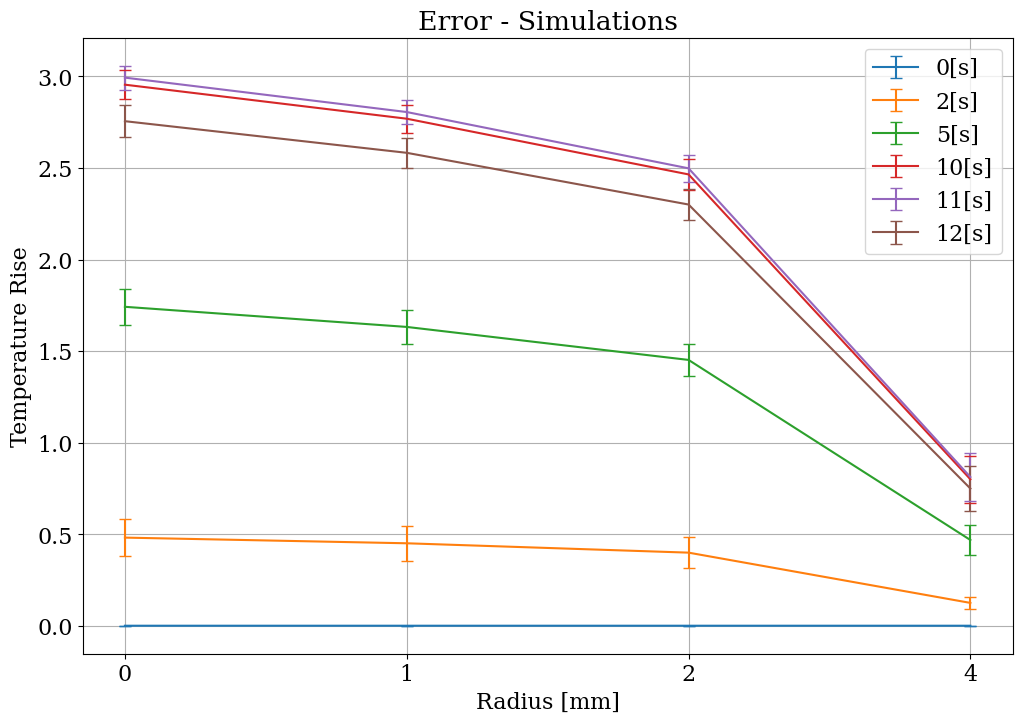

In [40]:
pyplot.figure(figsize=(12,8))
pyplot.title('Error - Simulations')
pyplot.xlabel('Radius [mm]')
pyplot.ylabel('Temperature Rise')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts0), yerr=sdTS_ts0,capsize=4,label='0[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts2), yerr=sdTS_ts2,capsize=4,label='2[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts4), yerr=sdTS_ts4,capsize=4,label='5[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts5), yerr=sdTS_ts5,capsize=4,label='10[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts6), yerr=sdTS_ts6,capsize=4,label='11[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts7), yerr=sdTS_ts7,capsize=4,label='12[s]')
pyplot.legend(loc='upper right')
# pyplot.xlim(-0.1,5);
pyplot.grid()
pyplot.savefig('figures/errorBars_Sim.png', dpi=300)

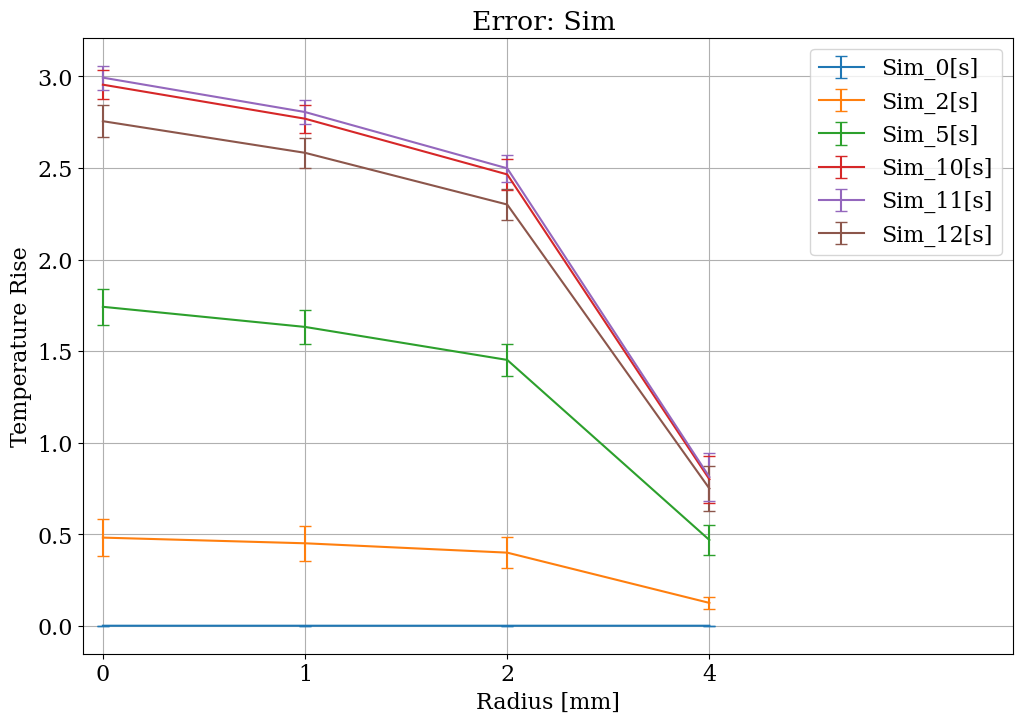

In [41]:
pyplot.figure(figsize=(12,8))
pyplot.title('Error: Sim ')
pyplot.xlabel('Radius [mm]')
pyplot.ylabel('Temperature Rise')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts0), yerr=sdTS_ts0,capsize=4,label='Sim_0[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts2), yerr=sdTS_ts2,capsize=4,label='Sim_2[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts4), yerr=sdTS_ts4,capsize=4,label='Sim_5[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts5), yerr=sdTS_ts5,capsize=4,label='Sim_10[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts6), yerr=sdTS_ts6,capsize=4,label='Sim_11[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts7), yerr=sdTS_ts7,capsize=4,label='Sim_12[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts0), yerr=sDev_ts0,capsize=4,label='Exp_0[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts2), yerr=sDev_ts2,capsize=4,label='Exp_2[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts4), yerr=sDev_ts4,capsize=4,label='Exp_5[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts5), yerr=sDev_ts5,capsize=4,label='Exp_10[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts6), yerr=sDev_ts6,capsize=4,label='Exp_11[s]')
# pyplot.errorbar(['0','1','2','4'], np.abs(average_ts7), yerr=sDev_ts7,capsize=4,label='Exp_12[s]')
pyplot.legend(loc='upper right')
pyplot.grid()
pyplot.xlim(-0.1,4.5)
pyplot.savefig('figures/errorBars_Sim.png', dpi=300)

In [42]:
##### Fix this with the timestep data 
# pyplot.figure(figsize=(12,8))
# pyplot.title('Error Bars: Sim vs. Exp')
# pyplot.xlabel('Radius [mm]')
# pyplot.ylabel('Temperature Rise')
# # plt.errorbar(['0'], np.abs(avgTS_ts0[0]), yerr=sdTS_ts0[0],capsize=4,label='Sim_0[s]')
# # plt.errorbar(['0'], np.abs(avgTS_ts2[0]), yerr=sdTS_ts2[0],capsize=4,label='Sim_2[s]')
# # pyplot.errorbar(['0'], np.abs(avgTS_ts4[0]), yerr=sdTS_ts4[0],capsize=4,label='Sim_5[s]')
# # plt.errorbar(['0'], np.abs(avgTS_ts5[0]), yerr=sdTS_ts5[0],capsize=4,label='Sim_10[s]')
# # plt.errorbar(['0'], np.abs(avgTS_ts6[0]), yerr=sdTS_ts6[0],capsize=4,label='Sim_11[s]')
# # plt.errorbar(['0'], np.abs(avgTS_ts7[0]), yerr=sdTS_ts7[0],capsize=4,label='Sim_12[s]')
# # plt.errorbar(['0'], np.abs(avg_ts0[0]), yerr=sd_ts0[0],capsize=4,label='Exp_0[s]')
# # plt.errorbar(['0'], np.abs(avg_ts2[0]), yerr=sd_ts2[0],capsize=4,label='Exp_2[s]')
# # pyplot.errorbar(['0'], np.abs(avg_ts4[0]), yerr=sd_ts4[0],capsize=4,label='Exp_5[s]')
# pyplot.errorbar(['0'], np.abs(avg4[0]), yerr=l4[0],capsize=4,label='Exp_10[s]')
# # plt.errorbar(['0'], np.abs(avg_ts6[0]), yerr=sd_ts6[0],capsize=4,label='Exp_11[s]')
# # plt.errorbar(['0'], np.abs(avg_ts7[0]), yerr=sd_ts7[0],capsize=4,label='Exp_12[s]')
# pyplot.legend(loc='upper right')
# pyplot.ylim(1,2)
# pyplot.grid()

In [43]:
#tbypoint[point][timestep][sample], 5x6x10
tbypoint = SimSamplesTempbyTime(tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10,
                         timesId)
len(tbypoint[0])

6

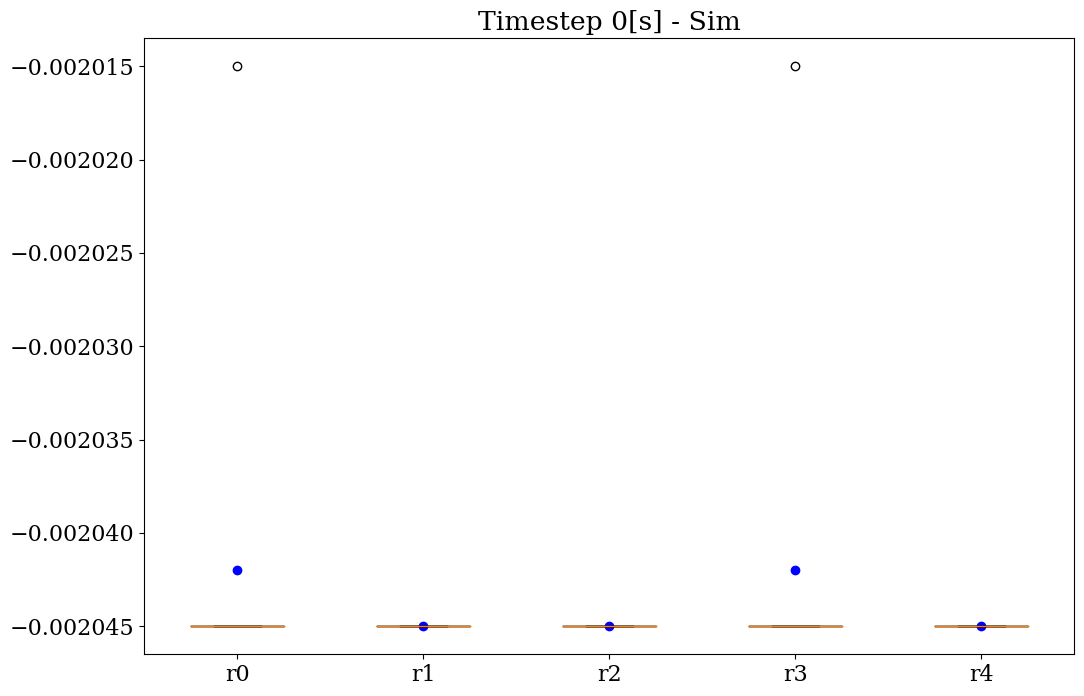

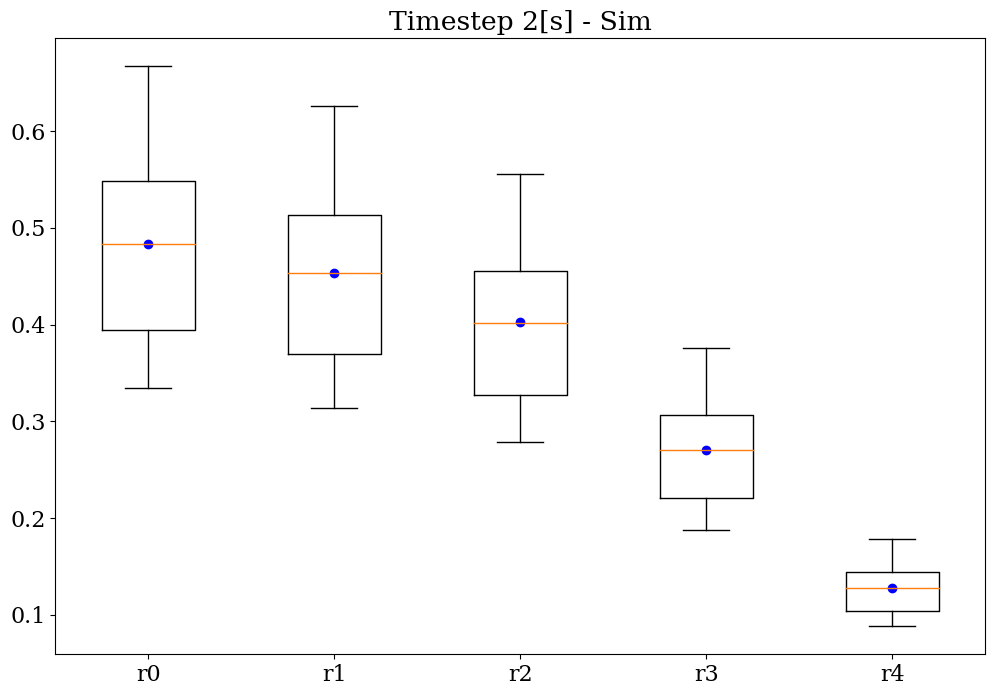

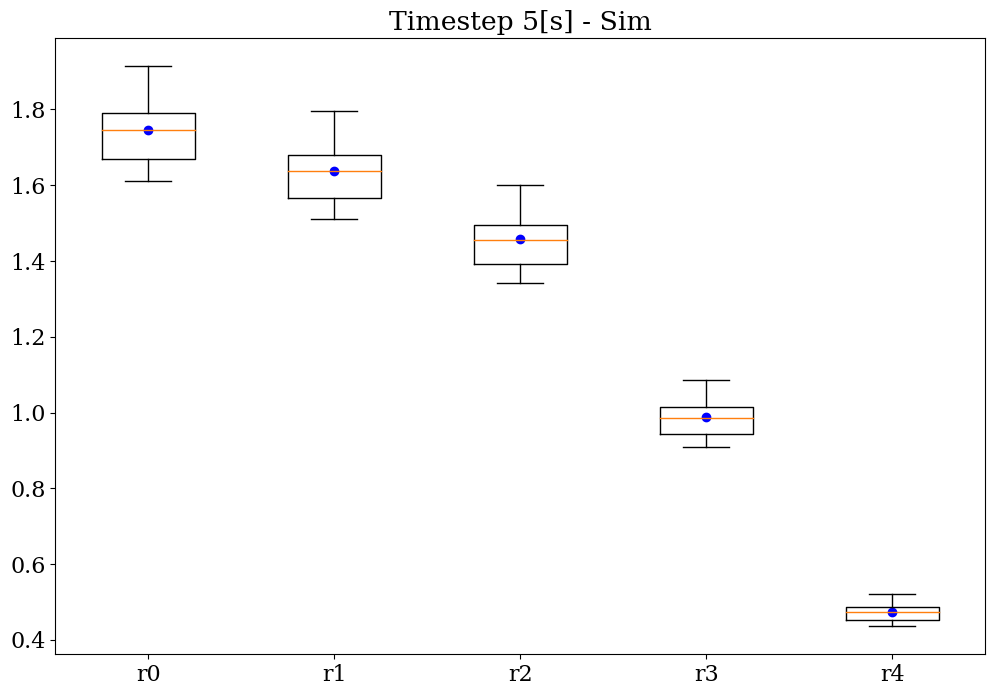

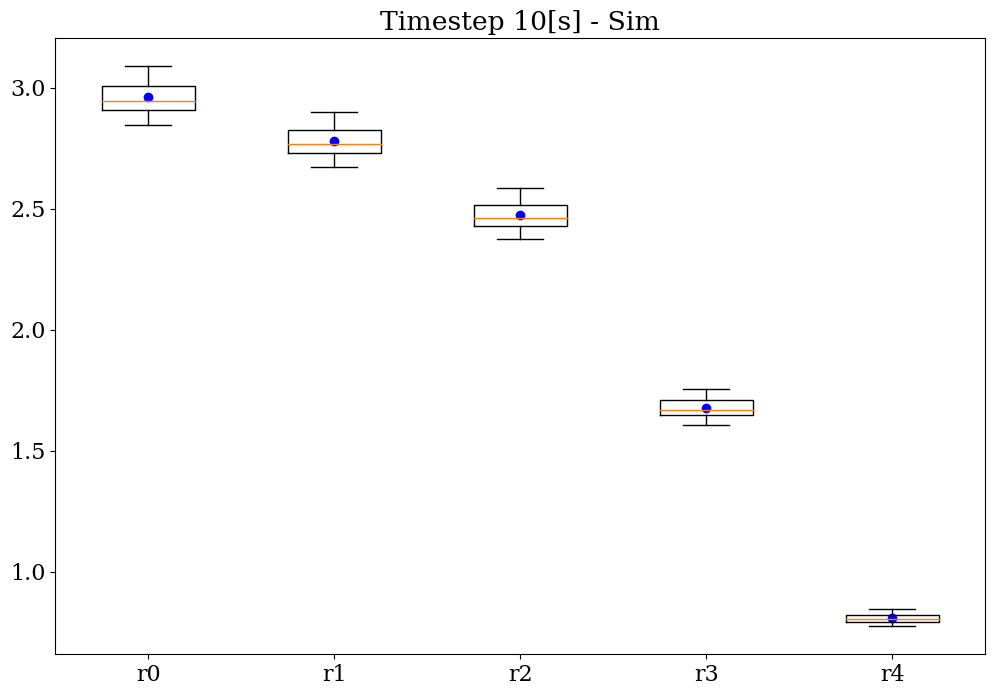

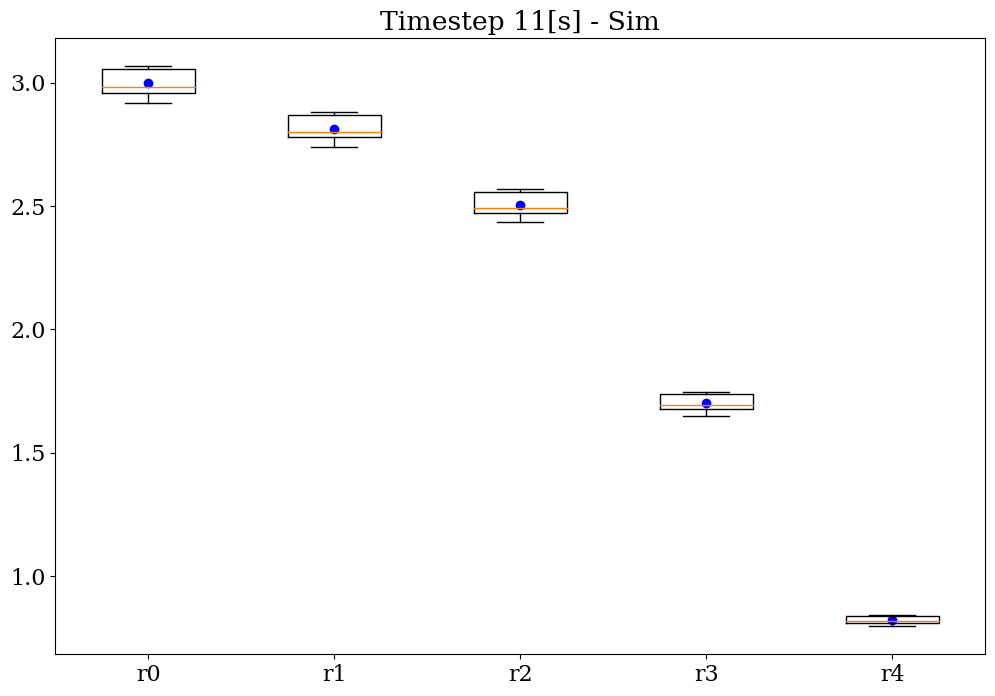

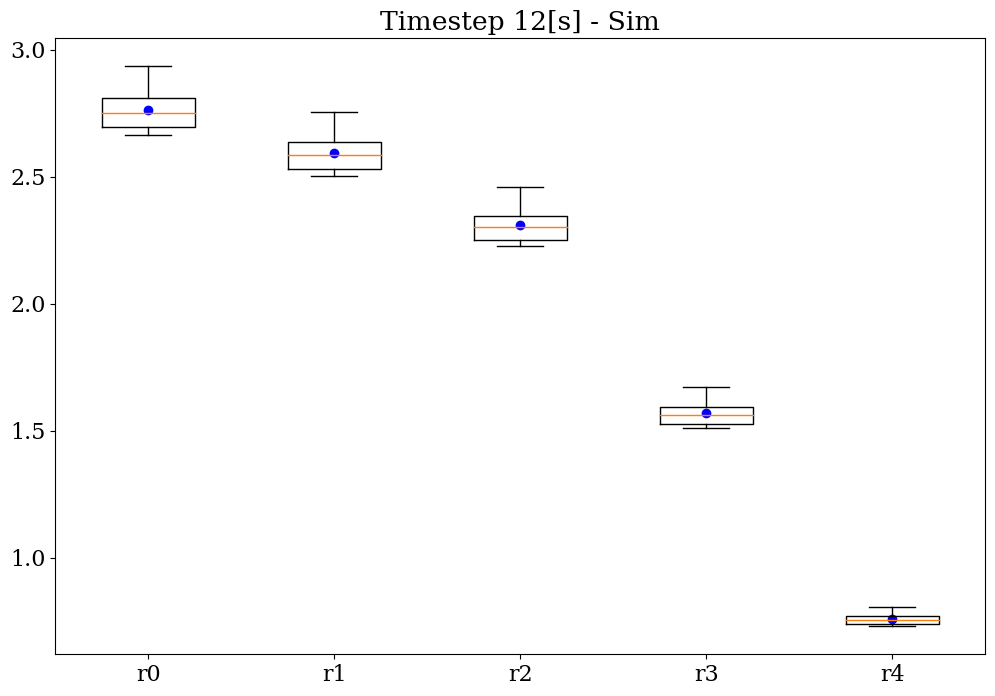

In [44]:
step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
t=[0,2,5,10,11,12]
i = 0;
while i < len(tbypoint[0]):
    pyplot.figure(figsize=(12,8))
    pyplot.boxplot([tbypoint[0][i],tbypoint[1][i],tbypoint[2][i],tbypoint[3][i],tbypoint[4][i]],labels=['r0','r1','r2','r3','r4'])
    pyplot.title('Timestep '+step[i]+' - Sim')
    pyplot.scatter(1,np.mean(tbypoint[0][i]), color='blue')
    pyplot.scatter(2,np.mean(tbypoint[1][i]), color='blue')
    pyplot.scatter(3,np.mean(tbypoint[2][i]), color='blue')
    pyplot.scatter(4,np.mean(tbypoint[3][i]), color='blue')
    pyplot.scatter(5,np.mean(tbypoint[4][i]), color='blue')
    tnum = t[i]
    pyplot.savefig('figures/errorBars_sim_t%i.png'%tnum, dpi=300)
    i+=1;

# Area Metric

In [34]:
# Identifying timestep indecies
time_E = list(timeE[75:150]-20)
index = time_E.index(0.0) # find index at time = 5.0[s]
# time_E[index],sd0[index];avg0[index];avgTS_ts5[0]
exp4 = [tempET4[0][index+75],tempET4[1][index+75],tempET4[2][index+75]] #4mm
exp2 = [tempET1[0][index+75],tempET1[1][index+75],tempET1[2][index+75]] #2mm
exp1 = [tempET3[0][index+75],tempET3[1][index+75],tempET3[2][index+75]] #1mm     
exp0 = [tempET2[0][index+75],tempET2[1][index+75],tempET2[2][index+75]] #center

In [35]:
# Collecting timestep data
# Radial = 0 mm, Temporal = 0,2,5,10,11,12 [s] 
indexN = time_E.index(0.0) 
normSimR0T0 = np.random.normal(avgTS_ts0[0], sdTS_ts0[0], 100000) 
normSimR4T0 = np.random.normal(avgTS_ts0[3], sdTS_ts0[3], 100000) 
normExpR0T0 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR4T0 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T0  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T0  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T0  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T0  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT0 = [expR0T0,expR1T0,expR2T0,expR4T0]

indexN = time_E.index(2.0) 
normSimR0T2 = np.random.normal(avgTS_ts2[0], sdTS_ts2[0], 100000) 
normSimR4T2 = np.random.normal(avgTS_ts2[3], sdTS_ts2[3], 100000) 
normExpR0T2 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR4T2 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T2  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T2  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T2  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T2  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT2 = [expR0T2,expR1T2,expR2T2,expR4T2]

indexN = time_E.index(5.0) 
normSimR0T5 = np.random.normal(avgTS_ts4[0], sdTS_ts4[0], 100000) 
normSimR4T5 = np.random.normal(avgTS_ts4[3], sdTS_ts4[3], 100000) 
normExpR0T5 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR4T5 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T5  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T5  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T5  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T5  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT5 = [expR0T5,expR1T5,expR2T5,expR4T5]

indexN = time_E.index(10.0) 
normSimR0T10 = np.random.normal(avgTS_ts5[0], sdTS_ts5[0], 100000) 
normSimR4T10 = np.random.normal(avgTS_ts5[3], sdTS_ts5[3], 100000) 
normExpR0T10 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR4T10 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T10 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T10 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T10 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T10 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT10 = [expR0T10,expR1T10,expR2T10,expR4T10]

indexN = time_E.index(11.0) 
normSimR0T11 = np.random.normal(avgTS_ts6[0], sdTS_ts6[0], 100000) 
normSimR4T11 = np.random.normal(avgTS_ts6[3], sdTS_ts6[3], 100000) 
normExpR0T11 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR4T11 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T11 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T11 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T11 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T11 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT11 = [expR0T11,expR1T11,expR2T11,expR4T11]

indexN = time_E.index(12.0) 
normSimR0T12 = np.random.normal(avgTS_ts7[0], sdTS_ts7[0], 100000) 
normSimR4T12 = np.random.normal(avgTS_ts7[3], sdTS_ts7[3], 100000) 
normExpR0T12 = np.random.normal(avg0[indexN], sd0[indexN], 100000) 
normExpR4T12 = np.random.normal(avg4[indexN], sd4[indexN], 100000) 
expR0T12 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T12 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T12 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T12 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT12 = [expR0T12,expR1T12,expR2T12,expR4T12]
expRallTall = [expRallT0,expRallT2,expRallT5,expRallT10,expRallT11,expRallT12]

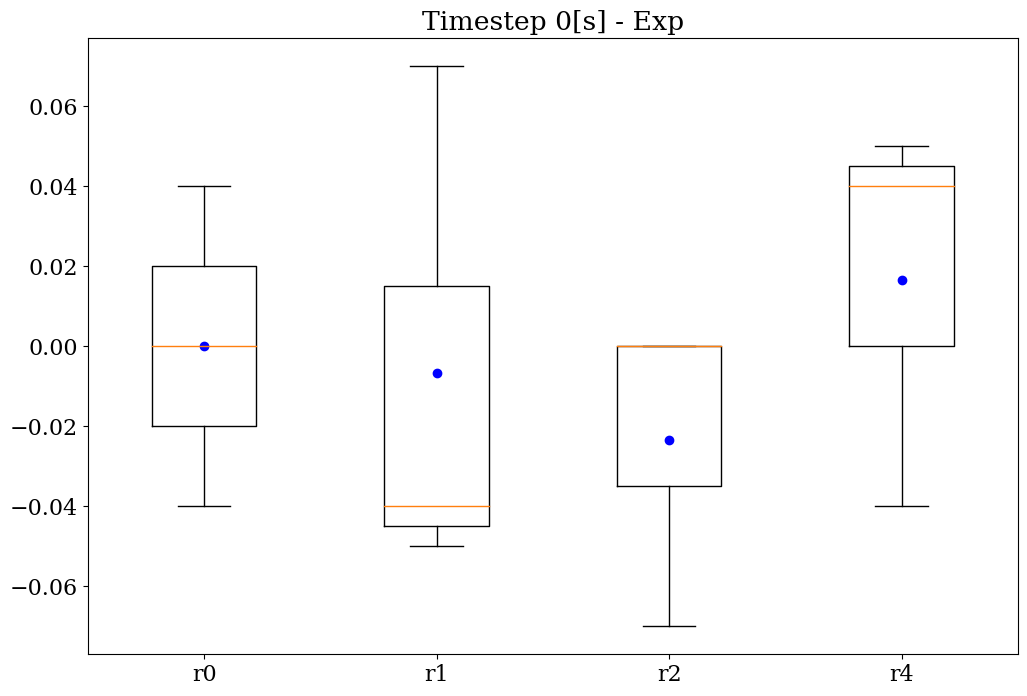

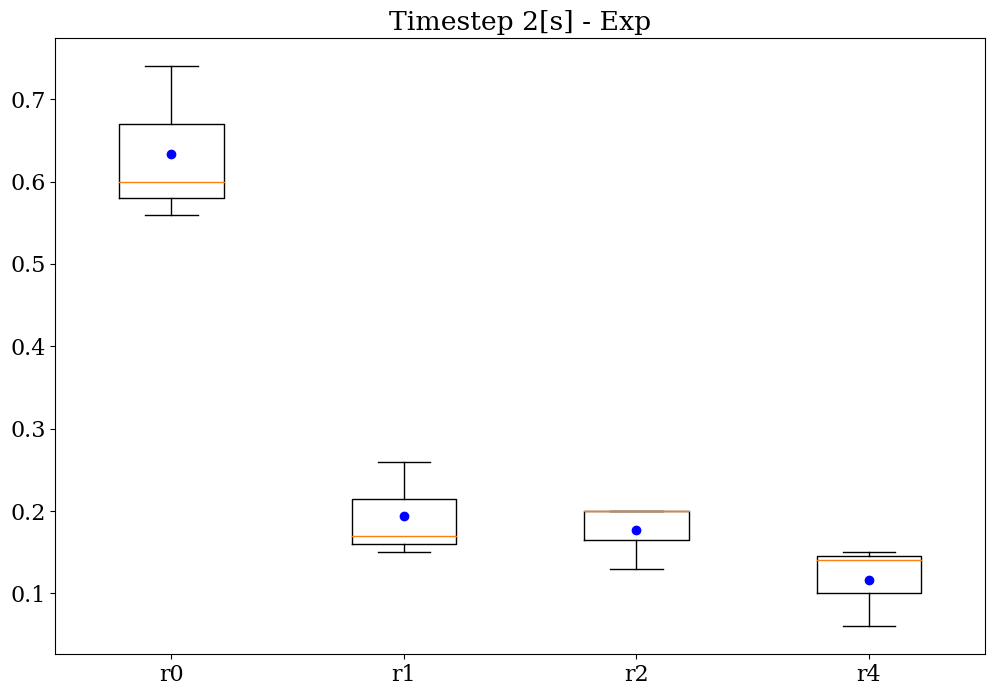

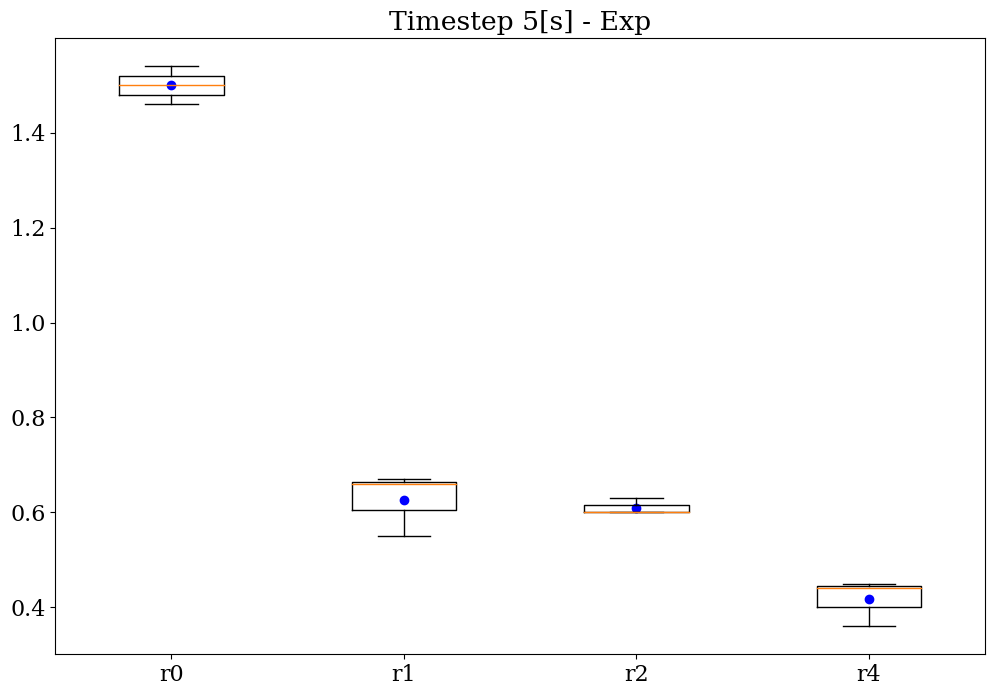

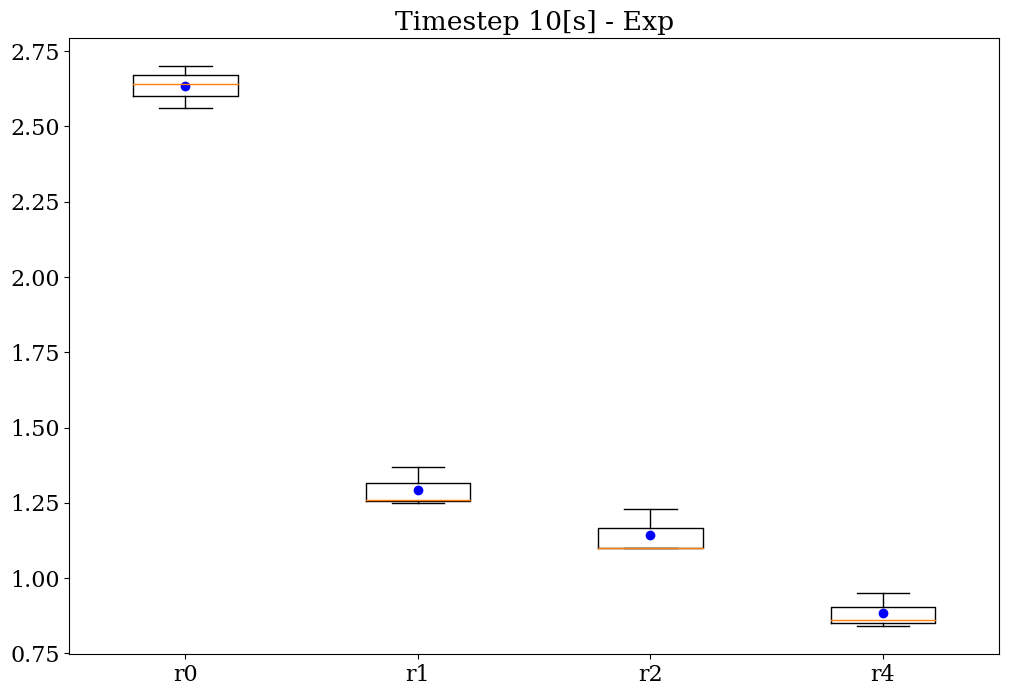

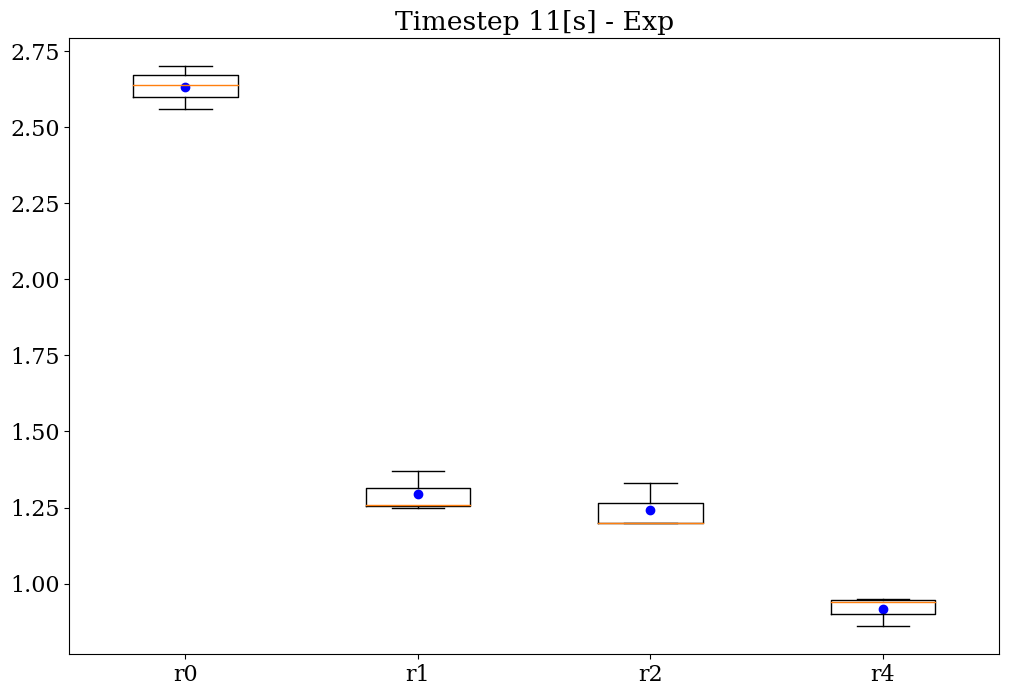

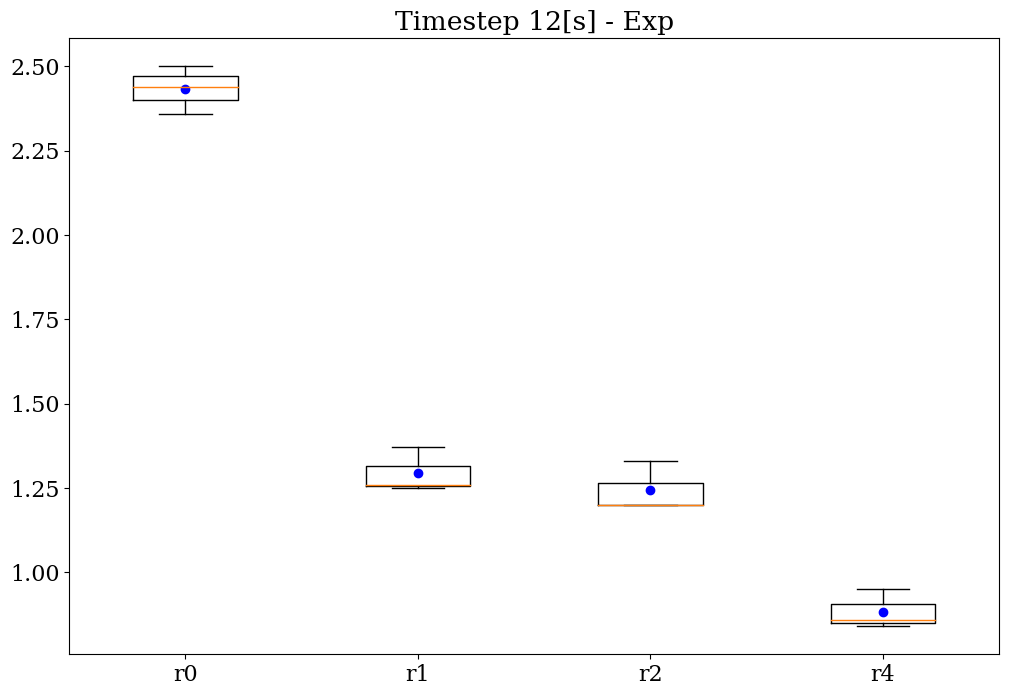

In [36]:
step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
t=[0,2,5,10,11,12]
i = 0;
while i < len(t):
    pyplot.figure(figsize=(12,8))
    pyplot.boxplot([expRallTall[i][0],expRallTall[i][1],expRallTall[i][2],expRallTall[i][3]],labels=['r0','r1','r2','r4'])
    pyplot.title('Timestep '+step[i]+' - Exp')
    pyplot.scatter(1,np.mean(expRallTall[i][0]), color='blue')
    pyplot.scatter(2,np.mean(expRallTall[i][1]), color='blue')
    pyplot.scatter(3,np.mean(expRallTall[i][2]), color='blue')
    pyplot.scatter(4,np.mean(expRallTall[i][3]), color='blue')
    tnum = t[i]
    pyplot.savefig('figures/errorBars_exp_t%i.png'%tnum, dpi=300)
    i+=1;

# Radial Location = Center 

0.3333333333333333

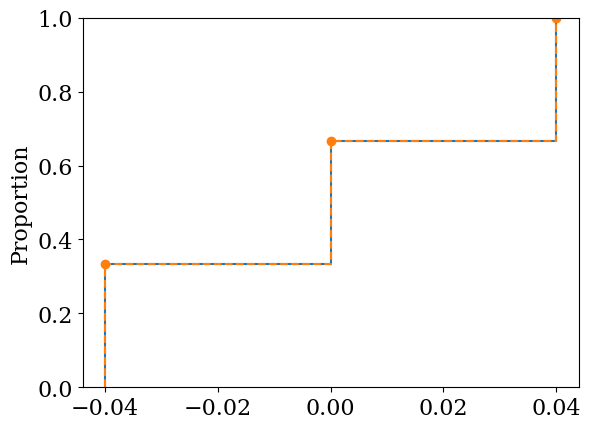

In [37]:
exp = [expR0T0,expR0T2,expR0T5,expR0T10,expR0T11,expR0T12]
sns.ecdfplot(data=expR0T0,label='Experiments')
ecdf = ECDF(expR0T0)
pyplot.step(ecdf.x,ecdf.y,'--o', where='post')
# pyplot.step(ecdf.x,ecdf.y-ecdf.y[1],'--o')
ecdf(-0.01)

In [41]:
tbypoint[5][5]

IndexError: list index out of range

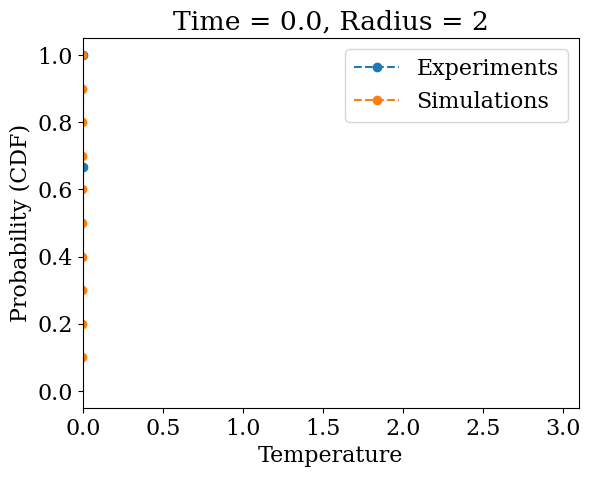

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral2 = integrate.quad(ecdfExpNorm, min(ecdfExpNorm.x),max(ecdfExpNorm.x))[0]


Area Metric (diff in CDFs Raw Exp) = 200.0 %


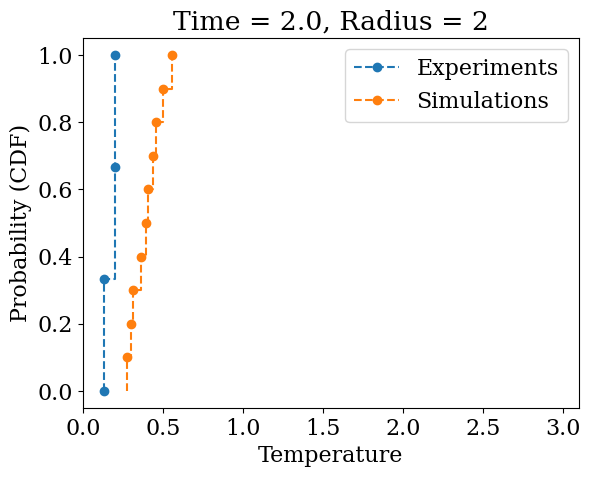

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

Area Metric (diff in CDFs Raw Exp) = 73.5157534299016 %


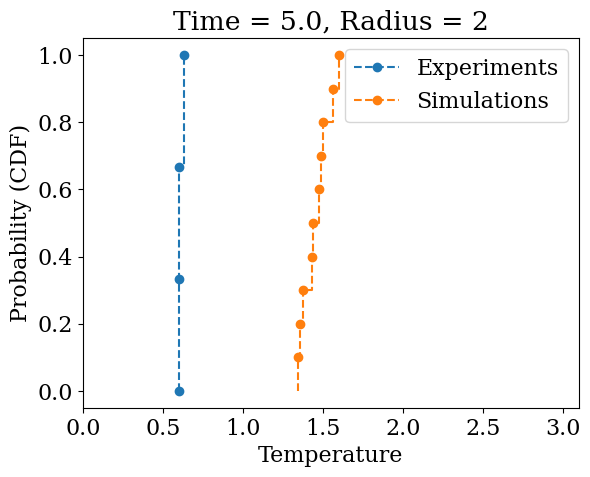

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

Area Metric (diff in CDFs Raw Exp) = 9.686020932651667 %


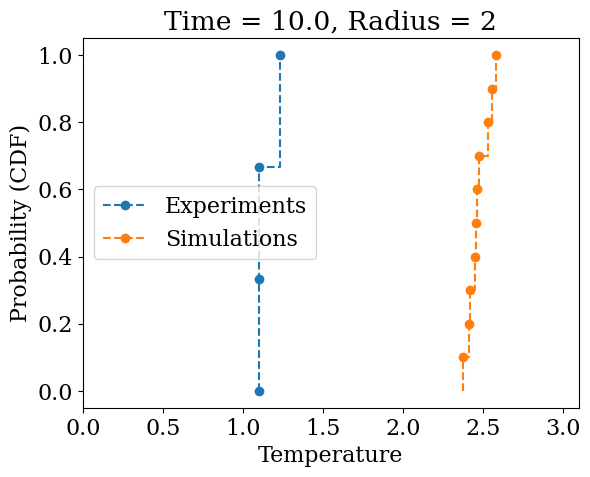

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

Area Metric (diff in CDFs Raw Exp) = 70.36825857015977 %


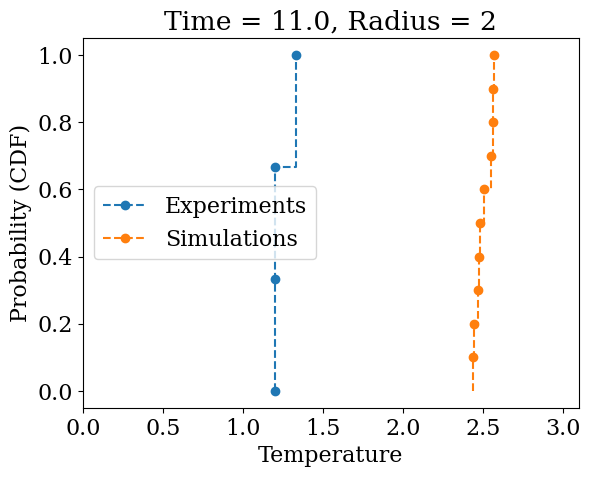

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

Area Metric (diff in CDFs Raw Exp) = 117.56067392768247 %


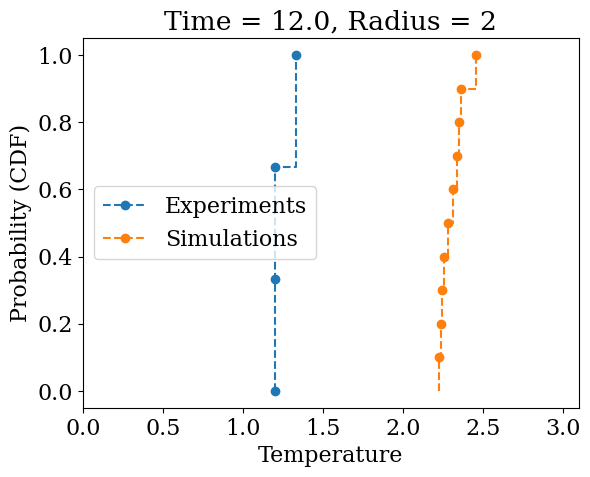

Area Metric (diff in CDFs Raw Exp) = 57.91955008214214 %


/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/1640332723.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

<Figure size 640x480 with 0 Axes>

In [39]:
# Plots
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR2T0,expR2T2,expR2T5,expR2T10,expR2T11,expR2T12]
sim = [tbypoint[2][0],tbypoint[2][1],tbypoint[2][2],tbypoint[2][3],tbypoint[2][4],tbypoint[2][5]]
normExp = [normExpR0T0,normExpR0T2,normExpR0T5,normExpR0T10,normExpR0T11,normExpR0T12]
normSim = [normSimR0T0,normSimR0T2,normSimR0T5,normSimR0T10,normSimR0T11,normSimR0T12]
time_E = list(timeE[75:150]-20)
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
#     pyplot.figure(figsize=(15,10)) 
    pyplot.title('Time = {}, Radius = 2'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)') 
    ecdfExp = ECDF(exp[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSimNorm = ECDF(normSim[s]) 
    ecdfSim = ECDF(sim[s])
#     ecdfSimNorm = ECDF(normExp[s])

    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations')
#     pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'--o', where='post',label='Normal Exp')
    pyplot.legend()
    pyplot.xlim(0, 3.1)
    pyplot.savefig('figures/manuscript_EDDS/ecdf/ecdf_t%i_r2.png'%t, dpi=300);
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))[0]
    integral2 = integrate.quad(ecdfExpNorm, min(ecdfExpNorm.x),max(ecdfExpNorm.x))[0]
    # Raw Data
    integral3 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))[0]

    # Return the difference between the two integrals.
    diff1 = np.abs(integral2 - integral1)
    avg1 = np.mean([integral2,integral1])
#     diff2 = np.abs(integral3 - integral1)
    print('Area Metric (diff in CDFs Raw Exp) =',(diff1/avg1)*100,'%')
#     print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1+integral3)/2))*100)
    pyplot.savefig('figures/AreaMetricPoint0Time%f.png'%timestep, dpi=300)
    s+=1

## Radial Location = 4mm

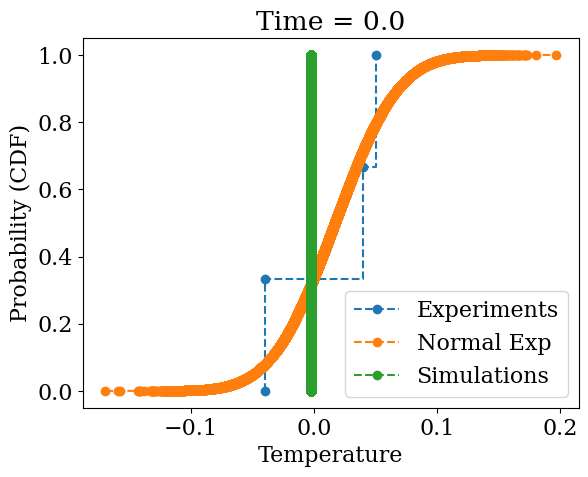

integral ecdfSim =  (0.0, 0.0)
integral ecdfExp =  (0.03333333333333333, 3.700743415417188e-17)
integral ecdfExpNorm =  (0.179885496568643, 2.8511700494449066e-06)
Area Metric (diff in CDFs Raw Exp) = 200.0
Area Metric (diff in CDFs Exp Norm) = 200.0


/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral3 = integrate.quad(ecdfExpNorm, min(ecdfExpNorm.x),max(ecdfExpNorm.x))


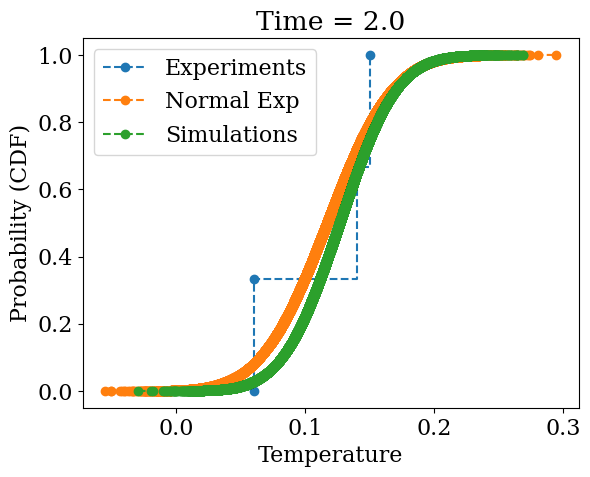

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


integral ecdfSim =  (0.1424032427720008, 1.3621048883555309e-05)
integral ecdfExp =  (0.03333333333333334, 3.700743415417189e-17)
integral ecdfExpNorm =  (0.17820827231502562, 7.928457294248403e-06)
Area Metric (diff in CDFs Raw Exp) = 124.1288658922004
Area Metric (diff in CDFs Exp Norm) = 22.33546074183014


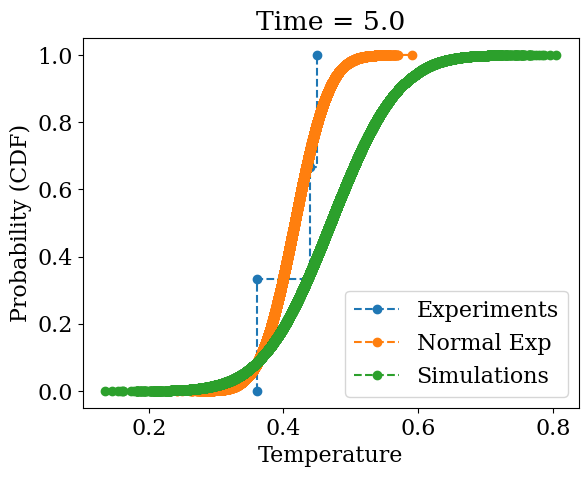

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


integral ecdfSim =  (0.33494550220477326, 9.174586825921871e-06)
integral ecdfExp =  (0.03333333333333337, 3.7007434154171926e-17)
integral ecdfExpNorm =  (0.1736244457473279, 1.0231580065606094e-05)
Area Metric (diff in CDFs Raw Exp) = 163.79554824579725
Area Metric (diff in CDFs Exp Norm) = 63.44104959683504


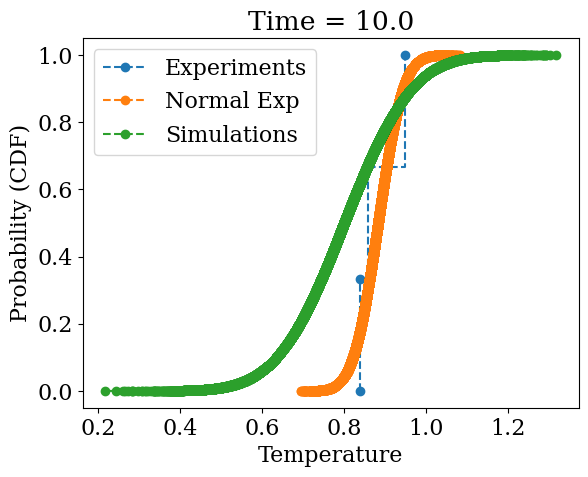

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


integral ecdfSim =  (0.5168477560256072, 0.0005512336347217148)
integral ecdfExp =  (0.06666666666666665, 7.401486830834375e-17)
integral ecdfExpNorm =  (0.19984569980620562, 1.646858652717964e-05)
Area Metric (diff in CDFs Raw Exp) = 154.2999013741092
Area Metric (diff in CDFs Exp Norm) = 88.4623833634649


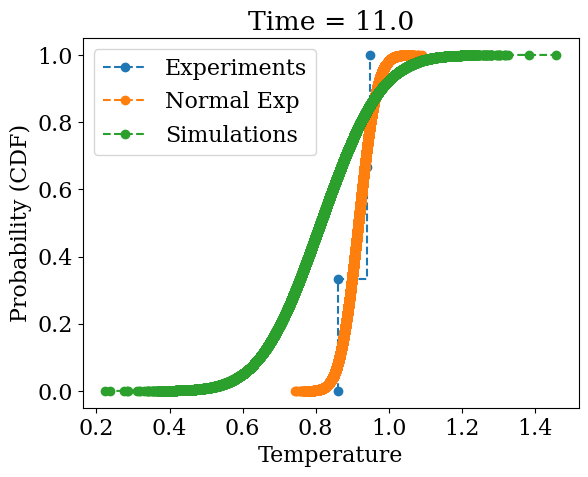

/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


integral ecdfSim =  (0.6446757878633207, 7.965520954944516e-06)
integral ecdfExp =  (0.03333333333333333, 3.700743415417188e-17)
integral ecdfExpNorm =  (0.17492186071450946, 2.1065802225106456e-06)
Area Metric (diff in CDFs Raw Exp) = 180.33458117819916
Area Metric (diff in CDFs Exp Norm) = 114.63037454144252


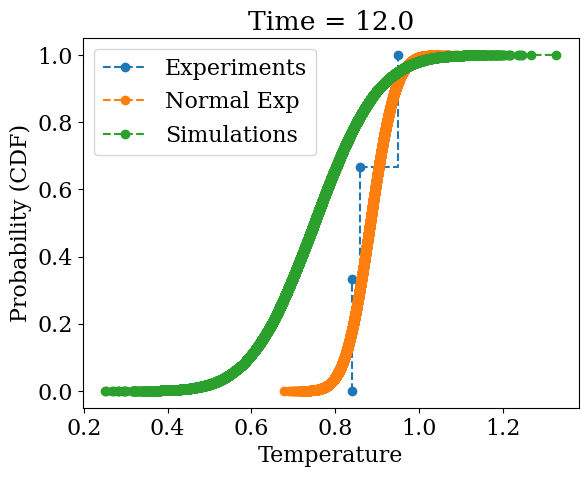

integral ecdfSim =  (0.5776065853227697, 8.388531231751095e-06)
integral ecdfExp =  (0.06666666666666665, 7.401486830834375e-17)
integral ecdfExpNorm =  (0.21165071721371068, 3.635136536894734e-06)
Area Metric (diff in CDFs Raw Exp) = 158.60969459103993
Area Metric (diff in CDFs Exp Norm) = 92.73423684087969


/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
/var/folders/wv/cp3w6c6x5fj24r_1d6f6cb9r0000gn/T/ipykernel_22186/2582104131.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


<Figure size 640x480 with 0 Axes>

In [40]:
# Plots
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR4T0,expR4T2,expR4T5,expR4T10,expR4T11,expR4T12]
normExp = [normExpR4T0,normExpR4T2,normExpR4T5,normExpR4T10,normExpR4T11,normExpR4T12]
normSim = [normSimR4T0,normSimR4T2,normSimR4T5,normSimR4T10,normSimR4T11,normSimR4T12]
time_E = list(timeE[75:150]-20)
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
#     pyplot.figure(figsize=(20,10)) 
    pyplot.title('Time = {}'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)') 
    ecdfExp = ECDF(exp[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSim = ECDF(normSim[s]) 
    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments')
    pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'--o', where='post',label='Normal Exp')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations')
#     sns.ecdfplot(data=exp[s],label='Experiments')
#     sns.ecdfplot(data=normExp[s],label='Normal Exp')
#     sns.ecdfplot(data=normSim[s],label='Simulations')
    pyplot.legend()
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSim, min(ecdfSim.x),max(ecdfSim.x))
    print('integral ecdfSim = ', integral1)
    integral2 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))
    print('integral ecdfExp = ', integral2)
    integral3 = integrate.quad(ecdfExpNorm, min(ecdfExpNorm.x),max(ecdfExpNorm.x))
    print('integral ecdfExpNorm = ', integral3)

    # Return the difference between the two integrals.
    diff1 = np.abs(np.abs(integral2[0]) - np.abs(integral1[0]))
    diff2 = np.abs(np.abs(integral3[0]) - np.abs(integral1[0]))
    print('Area Metric (diff in CDFs Raw Exp) =',(diff1/((integral1[0]+integral2[0])/2))*100)
    print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1[0]+integral3[0])/2))*100)
    pyplot.savefig('figures/AreaMetricPoint0Time%f.png'%timestep, dpi=300)
    s+=1

# Confidence intervals
- Look into Parametric 
- Assume: Gaussian Tolerance intervals
- Chi Squared Distribution 


In [37]:
n_exp     = len(exp[0])
n_expNorm = len(normExp[0])
n_simNorm = len(normSim[0])
    
dof_exp     = n_exp    -1
dof_expNorm = n_expNorm-1
dof_simNorm = n_simNorm-1    

In [38]:
n_expNorm # make this smaller

100000

In [39]:
from scipy.stats import norm
from scipy.stats import chi2


## Account for standard deviation 
## Account for samples

def conf_int(n,dof,data,coverage,confidence):
    # specify data coverage
    prop = coverage
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.isf(prop_inv)
    print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
    # specify confidence
    prob = confidence
    chi_critical = chi2.isf(q=prob, df=dof)
    print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))
    tol = np.sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
        ## should include std
    print('Tolerance Interval: %.3f' % tol)
    data_mean = np.mean(data)
    lower, upper = data_mean-tol, data_mean+tol
    print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))
#     pyplot.errorbar(n,data_mean,yerr=tol,fmt='o')
    print('Mean ', np.mean(data))
    print('SD ',np.std(data) )
    return

In [40]:
n    = len(exp[2]) 
dof  = n-1
data = exp[2]
coverage = 0.95 # data coverage
confidence = 0.95 # 
conf_int(n,dof,data,coverage,confidence)

Gaussian critical value: 1.960 (coverage=95%)
Chi-Squared critical value: 0.103 (prob=95%, dof=2)
Tolerance Interval: 9.993
-9.58 to 10.41 covers 95% of data with a confidence of 95%
Mean  0.4166666666666667
SD  0.04027681991198192


In [41]:
## plot std and tolerance to show the difference

## Heat Map 

In [42]:
radius = ["Center","1mm radius", "2mm radius", "4mm radius"]
time = ["2 sec","5 sec","10 sec","12 sec",]

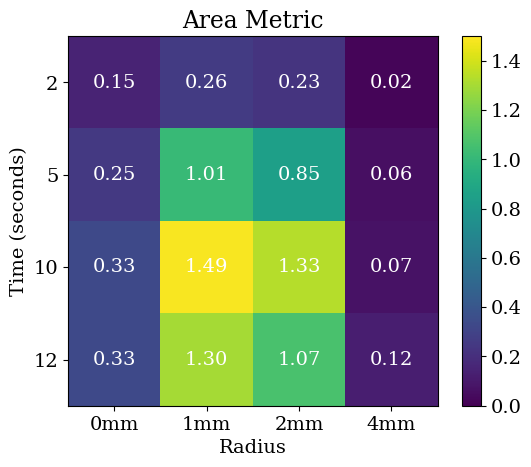

In [43]:
# Generate random data for the heatmap
data = np.array([[0.1475,0.2622,0.2276,0.0213], 
                       [0.2477,1.0136,0.8495,0.0593],
                       [0.3288,1.4870,1.3319,0.0731],
                       [0.3292,1.3001,1.0670,0.1240]]) #areametric
# Define row and column labels
radius_labels = ["0mm", "1mm", "2mm", "4mm"] #x axis
time_labels = ["2","5","10","12",] #y axis

# Heatmap range
hmin,hmax = 0.0,1.5

# Create a heatmap using matplotlib's imshow function
heatmap = pyplot.imshow(data, cmap='viridis', interpolation='nearest',vmin=hmin,vmax=hmax)

# Set row and column labels
pyplot.xticks(np.arange(len(radius_labels)), radius_labels)
pyplot.yticks(np.arange(len(time_labels)), time_labels)

# Add values as text annotations
for i in range(len(radius_labels)):
    for j in range(len(time_labels)):
        pyplot.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')

# Add colorbar to show the scale
pyplot.title('Area Metric')
pyplot.xlabel('Radius') 
pyplot.ylabel('Time (seconds)') 
pyplot.colorbar(heatmap)

# Save image
pyplot.savefig('figures/AreaMetric_HeatMap.png', dpi=300)

# Show the plot
pyplot.show()

In [38]:
#### You are here!!!!1

In [1]:
# p0 = [p0_ts0,p0_ts2,p0_ts5,p0_ts10,p0_ts11,p0_ts12]
# p1 = [p1_ts0,p1_ts2,p1_ts5,p1_ts10,p1_ts11,p1_ts12]
# p2 = [p2_ts0,p2_ts2,p2_ts5,p2_ts10,p2_ts11,p2_ts12]
# p3 = [p3_ts0,p3_ts2,p3_ts5,p3_ts10,p3_ts11,p3_ts12]
# p4 = [p4_ts0,p4_ts2,p4_ts5,p4_ts10,p4_ts11,p4_ts12]
# step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
# t=[0,2,5,10,11,12]
# i = 0;
# while i < len(p0):
#     pyplot.figure(figsize=(12,8))
#     pyplot.boxplot([p0[i],p1[i],p2[i],p3[i],p4[i]],labels=['r0','r1','r2','r3','r4'])
#     pyplot.title('Timestep '+step[i]+' - Sim')
#     pyplot.scatter(1,np.mean(p0[i]), color='blue')
#     pyplot.scatter(2,np.mean(p1[i]), color='blue')
#     pyplot.scatter(3,np.mean(p2[i]), color='blue')
#     pyplot.scatter(4,np.mean(p3[i]), color='blue')
#     pyplot.scatter(5,np.mean(p4[i]), color='blue')
#     tnum = t[i]
#     pyplot.savefig('figures/errorBars_sim_t%i.png'%tnum, dpi=300)
#     i+=1;

In [2]:
# p0 = [a0_ts0,a0_ts2,a0_ts4,a0_ts5,a0_ts6,a0_ts7]
# p1 = [a1_ts0,a1_ts2,a1_ts4,a1_ts5,a1_ts6,a1_ts7]
# p2 = [a2_ts0,a2_ts2,a2_ts4,a2_ts5,a2_ts6,a2_ts7]
# # p3 = [a3_ts0,a3_ts2,a3_ts4,p3_ts5,a3_ts6,a3_ts7]
# p4 = [a4_ts0,a4_ts2,a4_ts4,a4_ts5,a4_ts6,a4_ts7]
# step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
# t=[0,2,5,10,11,12]
# i = 0;
# while i < len(p0):
#     pyplot.figure(figsize=(12,8))
#     pyplot.boxplot([p0[i],p1[i],p2[i],p4[i]],labels=['r0','r1','r2','r4'])
#     pyplot.title('Timestep '+step[i]+' - Exp')
#     pyplot.scatter(1,np.mean(p0[i]), color='blue')
#     pyplot.scatter(2,np.mean(p1[i]), color='blue')
#     pyplot.scatter(3,np.mean(p2[i]), color='blue')
# #     pyplot.scatter(4,np.mean(p3[i]), color='blue')
#     pyplot.scatter(4,np.mean(p4[i]), color='blue')
#     tnum = t[i]
#     pyplot.ylabel('Temperature Rise')
#     pyplot.savefig('figures/errorBars_exp_t%i.png'%tnum, dpi=300)
#     i+=1;

In [3]:
# # Experiments
# timeExp = data_time[75:150]-20
# timeExp = list(timeExp)
# timeExp.index(timesteps[1])
# timesIdExp = [timeExp.index(0),timeExp.index(timesteps[1]),timeExp.index(timesteps[2]),
#            timeExp.index(timesteps[3]),timeExp.index(timesteps[4]),timeExp.index(timesteps[5]),
#            timeExp.index(timesteps[6]),timeExp.index(timesteps[7])]

In [4]:
# ### Experiments sample
# data_time
# # Center Points 
# a0_ts0 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[0]]] #center
# a0_ts2 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[2]]] #center
# a0_ts4 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[4]]] #center
# a0_ts5 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[5]]] #center
# a0_ts6 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[6]]] #center
# a0_ts7 = [np.array(data_Exp1W_05lm['T2_t1'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T2_t2'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T2_t3'][75:150])[timesIdExp[7]]] #center

# # 1mm
# a1_ts0 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[0]]] #center
# a1_ts2 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[2]]] #center
# a1_ts4 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[4]]] #center
# a1_ts5 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[5]]] #center
# a1_ts6 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[6]]] #center
# a1_ts7 = [np.array(data_Exp1W_05lm['T3_t1'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T3_t2'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T3_t3'][75:150])[timesIdExp[7]]] #center

# # 2mm
# a2_ts0 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[0]]] #center
# a2_ts2 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[2]]] #center
# a2_ts4 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[4]]] #center
# a2_ts5 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[5]]] #center
# a2_ts6 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[6]]] #center
# a2_ts7 = [np.array(data_Exp1W_05lm['T1_t1'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T1_t2'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T1_t3'][75:150])[timesIdExp[7]]] #center

# # 4mm
# a4_ts0 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[0]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[0]]] #center
# a4_ts2 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[2]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[2]]] #center
# a4_ts4 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[4]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[4]]] #center
# a4_ts5 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[5]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[5]]] #center
# a4_ts6 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[6]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[6]]] #center
# a4_ts7 = [np.array(data_Exp1W_05lm['T4_t1'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T4_t2'][75:150])[timesIdExp[7]],np.array(data_Exp1W_05lm['T4_t3'][75:150])[timesIdExp[7]]] #center

In [5]:
# sim = [p0_ts0,p0_ts2,p0_ts5,p0_ts10,p0_ts11,p0_ts12]
# exp = [a0_ts0,a0_ts2,a0_ts4,a0_ts5,a0_ts6,a0_ts7]
# step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
# t = [0,2,5,10,11,12]
# i = 0;
# while i < len(sim):
#     pyplot.figure(figsize=(12,8))
#     pyplot.boxplot([sim[i],exp[i]],labels=['Sim', 'Exp'])
#     pyplot.title('Timestep '+step[i]+' at r=0' )
#     pyplot.scatter(1,np.mean(sim[i]), color='blue')
#     pyplot.scatter(2,np.mean(exp[i]), color='blue')
#     pyplot.ylabel('Temperature Rise')
#     pyplot.savefig('figures/errorBars_expVSsim_r0_t%i.png'%t[i], dpi=300)
#     i+=1

In [6]:
# sim = [p4_ts0,p4_ts2,p4_ts5,p4_ts10,p4_ts11,p4_ts12]
# exp = [a4_ts0,a4_ts2,a4_ts4,a4_ts5,a4_ts6,a4_ts7]
# step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
# t = [0,2,5,10,11,12]
# i = 0;
# while i < len(sim):
#     pyplot.figure(figsize=(12,8))
#     pyplot.boxplot([sim[i],exp[i]],labels=['Sim', 'Exp'])
#     pyplot.title('Timestep '+step[i]+' at r=4' )
#     pyplot.scatter(1,np.mean(sim[i]), color='blue')
#     pyplot.scatter(2,np.mean(exp[i]), color='blue')
#     pyplot.ylabel('Temperature Rise')
#     pyplot.savefig('figures/errorBars_expVSsim_r4_t%i.png'%t[i], dpi=300)
#     i+=1

In [ ]:
# from matplotlib import pyplot
# from numpy.random import normal
# from numpy import hstack
# from scipy import integrate
# from statsmodels.distributions.empirical_distribution import ECDF

# ecdfSim4 = ECDF(p4_ts5)
# ecdfExp4 = ECDF(a4_ts4)
# simecdfx4 = ecdfSim4.x
# simecdfy4 = ecdfSim4.y
# expecdfx4 = ecdfExp4.x
# expecdfy4 = ecdfExp4.y
# expecdfx4[0], simecdfx4[0] = 0, 0
# np.append(expecdfx4,0.521392)
# np.append(expecdfy4,1)
# ecdfxExpArea4 = integrate.trapezoid(expecdfy4,x=expecdfx4)
# ecdfxSimArea4 = integrate.trapezoid(simecdfy4,x=simecdfx4)
# area_metric4 = ecdfxExpArea4 - ecdfxSimArea4

# ecdfSim0 = ECDF(p0_ts5)
# ecdfExp0 = ECDF(a0_ts4)
# simecdfx0 = ecdfSim0.x
# simecdfy0 = ecdfSim0.y
# expecdfx0 = ecdfExp0.x
# expecdfy0 = ecdfExp0.y
# expecdfx0[0], simecdfx0[0] = 0, 0
# np.append(expecdfx0,0.521392)
# np.append(expecdfy0,1)
# ecdfxExpArea0 = integrate.trapezoid(expecdfy0,x=expecdfx0)
# ecdfxSimArea0 = integrate.trapezoid(simecdfy0,x=simecdfx0)
# area_metric0 = ecdfxExpArea0 - ecdfxSimArea0

# print('Area metric @5 seconds @ Point 4 = ', area_metric4)
# print('Area metric @5 seconds @ Point 0 = ', area_metric0)

In [ ]:
# # importing libraries
# import seaborn as sns
# import matplotlib.pyplot as plt
 
# # loading exercise dataset provided by seaborn
# sim = [p0_ts5,p4_ts5]
# exp = [a0_ts4,a4_ts4]
# t = [5]
# r = [0,4]
# i = 0
# # pyplot.figure(figsize=(12,8))
# # pyplot.title('CDF (time='+ str(t[0]) +'[s],r=' + str(r[0]) +'[mm])')
# # sns.ecdfplot(data=sim[0])
# # sns.ecdfplot(data=exp[0])
# # pyplot.xlabel('Temperature Rise')
# # pyplot.savefig('figures/cdf_expVSsim_r0_t5.png', dpi=300)

# pyplot.figure(figsize=(12,8))
# pyplot.title('CDF of time='+ str(t[0]) +'[s] r=' + str(r[1]) +'[mm]')
# cdf1 = sns.ecdfplot(data=sim[1])
# cdf2 = sns.ecdfplot(data=exp[1])
# pyplot.xlabel('Temperature Rise')

# pyplot.savefig('figures/cdf_expVSsim_r4_t5.png', dpi=300)


# Validation Metrics

In [ ]:
# timeQTY = np.arange(start=0, stop=12.25, step=0.25)
# expC,simC, i = [],[],1 
# while i < len(timeQTY):
#     exptemp = average4[timeExp.index(timeQTY[i])] # exp
#     expC.append(exptemp);
#     simtemp = samplemeanP4[my_list.index(timeQTY[i])]  # sim
#     simC.append(simtemp)
#     i+=1

# MSE = np.square(np.subtract(expC,simC)).mean() 
# RMSE = math.sqrt(MSE/len(expC))
# #normRMSE = RMSE/(np.max(np.subtract(expC,simC))- np.min(np.subtract(expC,simC)))
# print("Root Mean Square Error:\n")
# print(RMSE)

### Average& Standard Deviations of Samples
Note this is over all samples at 1 location along the diameter. It doesn't account for the other uncertainties based on location of data collection. 

### Combining 0mm and 1mm samples 

In [ ]:
# i = 0
# samplemean, samplestd = [],[]
# while i < len(dataSample1['Time [s]']):
#     s1_0=dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s2_0=dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s3_0=dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s4_0=dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s5_0=dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s6_0=dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s7_0=dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s8_0=dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s9_0=dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s10_0=dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
#     s1_1=dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s2_1=dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s3_1=dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s4_1=dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s5_1=dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s6_1=dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s7_1=dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s8_1=dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s9_1=dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s10_1=dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
#     s1_2=dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s2_2=dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s3_2=dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s4_2=dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s5_2=dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s6_2=dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s7_2=dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s8_2=dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s9_2=dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
#     s10_2=dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
#     samples = [s1_0,s2_0,s3_0,s4_0,s5_0,s6_0,s7_0,s8_0,s9_0,s10_0,
#                s1_1,s2_1,s3_1,s4_1,s5_1,s6_1,s7_1,s8_1,s9_1,s10_1,
#                s1_2,s2_2,s3_2,s4_2,s5_2,s6_2,s7_2,s8_2,s9_2,s10_2]
#     samplemean.append(np.mean(samples))
#     samplestd.append(np.std(samples))
#     i +=1

In [ ]:
# pyplot.figure(figsize=(12,8))
# pyplot.xlabel('time [s]')
# pyplot.ylabel('Temperature Rise')
# pyplot.title('Sim (r=0-2mm) vs. Exp (r=0) [DIAMETER ONLY]')
# pyplot.plot(dataSample1['Time [s]'],samplemean, label='Model&1SD', color='lightgreen',linewidth=5)
# pyplot.fill_between(dataSample1['Time [s]'],samplemean+1*np.max(samplestd),samplemean-1*np.max(samplestd), color='green')
# pyplot.plot(timeE[75:150]-19.65, avg0,linestyle='-',label="Experiments&1SD",color="black",linewidth=5)
# # pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
# pyplot.fill_between(timeE[75:150]-19.65,u0,l0, color="lightgray",alpha=0.75)
# pyplot.grid()
# pyplot.legend(loc='lower center');
# pyplot.xlim(-0.1,12);
# pyplot.savefig('figures/sim_point0-2_vs_exppoint0_avg.png', dpi=300)


# Sampling - LHS 
This has the outputs from the latin hypercube sampling for the three input parameters. 

In [ ]:
# # Specifications: 
#     # 1)velocity [0.49-0.51], 2)power [0.9995,1.0005], 3)powerduration[1,3]
#     # Uniform Distributions 
# # Quantities from LHS_samples_v1.out
# velocity = ['VFR [L/min]',0.49443986342754215,0.49727473790757359,0.50662655679974711,0.50958889995235945,0.49179642068222162,0.49413438308052721,0.50741464606951925,0.50837221808731559,0.49976822379976510,0.49110360241495071]
# power = ['Power[W]',0.99985413804277778,1.0002659078601281,0.99979680049582387,1.0004908209322021,1.0003082816863897,0.99989673660648992,1.0000184179912321,0.99968772122613159,1.0001117438615765,0.99998663799837229]
# # Quantiteis from LHS_samples_v5.out
# powerOnOff = ['Time to Max Power[s]',1.7082760855555534,2.5318157202564180,1.5936009916476905,2.9816418644040823,2.6165633727796376,1.7934732129797339,2.0368359824642539,1.3754424522630870,2.2234877231530845,1.9732759967446327]
# samplesNames = ['','Sample1','Sample2','Sample3','Sample4','Sample5',
#                'Sample6','Sample7','Sample8','Sample9','Sample10']
# inputsProp = pd.DataFrame([samplesNames,velocity,power,powerOnOff])
# inputsPropTrans = inputsProp.transpose()
# inputsPropTrans

# Velocity Analysis 
- This was done during the last team meeting 
- Need to fix this for next meeting/report

In [ ]:
# velocity = pd.read_csv("data_sim/outputVel_vel0.5_p1.0_COARSE.csv",skiprows = 4)
# newvelocity = velocity.transpose()
# velnew = newvelocity[1199]
# velocity

#### Timesteps & Index Search

In [ ]:
# headerLabels = dataSample1.columns
# timesteps = [0.100000001,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
# my_list = [dataSample1[headerLabels[0]]]
# my_list = list(my_list[0][0:])
# # timesId = my_list.index(0.25)
# timesId = [my_list.index(timesteps[0]),my_list.index(timesteps[1]),my_list.index(timesteps[2]),
#            my_list.index(timesteps[3]),my_list.index(timesteps[4]),my_list.index(timesteps[5]),
#            my_list.index(timesteps[6]),my_list.index(timesteps[7])]